In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path_coverage = 'tme_data/sets/v2_maze_2/coverage'
path_distances = 'tme_data/sets/v2_maze_2/distances'

In [3]:
os.chdir(path_coverage)

In [4]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return f.read()

In [5]:
matrix_greedy = []
matrix_minPos = []
matrix_combined = []
matrix_nearest = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('greedy' in file_path):
            matrix_greedy.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_minPos.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_combined.append(np.loadtxt(file_path))
        if('nearest' in file_path):
            matrix_nearest.append(np.loadtxt(file_path))

np_matrix_greedy = np.array(matrix_greedy)
np_matrix_minPos = np.array(matrix_minPos)
np_matrix_combined = np.array(matrix_combined)
np_matrix_nearest = np.array(matrix_nearest)
print(np_matrix_greedy.shape)
print(np_matrix_minPos.shape)
print(np_matrix_combined.shape)
print(np_matrix_nearest.shape)

(30,)
(26,)
(20,)
(28,)


In [6]:
os.chdir('../distances')

matrix_distance_greedy = []
matrix_distance_minPos = []
matrix_distance_combined = []
matrix_distance_nearest = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('greedy' in file_path):
            matrix_distance_greedy.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined.append(np.loadtxt(file_path))
        if('nearest' in file_path):
            matrix_distance_nearest.append(np.loadtxt(file_path))

matrix_distance_greedy = np.array(matrix_distance_greedy)
matrix_distance_minPos = np.array(matrix_distance_minPos)
matrix_distance_combined = np.array(matrix_distance_combined)
matrix_distance_nearest = np.array(matrix_distance_nearest)
print(matrix_distance_greedy.shape)
print(matrix_distance_minPos.shape)
print(matrix_distance_combined.shape)
print(matrix_distance_nearest.shape)

(30,)
(26,)
(20,)
(28,)


In [7]:
def neg_eighty_check(matrix):
    result = True
    if(matrix.shape[0] == 80):
        result = False
    return result

In [8]:
def eighty_build(matrix):
    result = matrix
    if (neg_eighty_check(matrix)):
        number = 80-matrix.shape[0]
        temp_2 = np.full(number, matrix[-1])
        result = np.insert(result, -1, temp_2)
    return result

In [9]:
def eighty_build_distance(matrix):
    result = matrix
    if (neg_eighty_check(matrix)):
        number = 80-matrix.shape[0]
        #temp_2 = np.full((number, 4), matrix[-1][:])
        #temp_2 = np.repeat(matrix[-1], number, axis=0)
        temp_2 = np.tile(matrix[-1], (number, 1))
        result = np.append(result, temp_2)
        result = result.reshape((80, -1))
    return result

In [10]:
def matrix_builder(matrix, distance_matrix):
    temp = []
    for i in range(80):
        temp.append(i*5)
    temp = np.array(temp)
    result = eighty_build(matrix[0][:, 1])
    result_2 = np.array(temp)
    result_2 = eighty_build_distance(distance_matrix[0][:,1:])
    index_array = []
    for i in range(len(matrix)):
        temp = matrix[i][:, 1]
        temp = eighty_build(temp)
        if(i < distance_matrix.shape[0]):
            temp_2 = distance_matrix[i][:,1:]
            temp_2 = eighty_build_distance(temp_2)
            if (temp[-1] > 0.90):
                test_passed = False
                start_value = -1
                index = 0
                count = 0
                for j in range(79):
                    if (np.abs(temp[j] - temp[j+1]) < 0.002):
                        if (temp[j+1] - start_value > 0.002):
                            index = j+1
                            start_value = temp[j+1]
                            count = 0
                        if (count >= 20):
                            break
                        count += 1
                    for x in range(len(temp_2[0])):
                        if (np.abs(temp_2[j][x] - temp_2[j+1][x]) > 5):
                            test_passed = True
                if(not test_passed):
                    result = np.c_[result, temp]
                    result_2 = np.c_[result_2, temp_2]
                    index_array.append(index)
    return result, result_2, index_array

In [11]:
def matrix_splice(matrix, length):
    result_distance = matrix[:, 0]
    result_count = matrix[:, 0]
    result_distance_sum = matrix[:, 0]
    result_count_sum = matrix[:, 0]

    temp = matrix[:, 1:]
    loop = temp.shape[1]
    loop = loop / (length*2)
    loop = int(loop)

    for i in range(loop):
        num_1 = length
        num_2 = length*2
        temp_distance = temp[:, 0:num_1]
        temp_count = temp[:, num_1:num_2]
        temp_distance_sum = np.sum(temp_distance, axis=1)
        temp_count_sum = np.sum(temp_count, axis=1)
        result_distance=np.c_[result_distance, temp_distance]
        result_count=np.c_[result_count, temp_count]
        result_distance_sum = np.c_[result_distance_sum, temp_distance_sum]
        result_count_sum = np.c_[result_count_sum, temp_count_sum]
        temp = temp[:, num_2:]
        
    return result_distance, result_count, result_distance_sum, result_count_sum

In [12]:
def min_mean_max_extraction(matrix):
    result = np.empty(3)
    result[0] = np.min(matrix)
    result[1] = np.mean(matrix)
    result[2] = np.max(matrix)
    return result

In [13]:
nearest_plottable, nearest_distance_plottable, nearest_time_taken = matrix_builder(np_matrix_nearest, matrix_distance_nearest)
greedy_plottable, greedy_distance_plottable, greedy_time_taken = matrix_builder(np_matrix_greedy, matrix_distance_greedy)
minPos_plottable, minPos_distance_plottable, minPos_time_taken = matrix_builder(np_matrix_minPos, matrix_distance_minPos)
combined_plottable, combined_distance_plottable, combined_time_taken = matrix_builder(np_matrix_combined, matrix_distance_combined)

In [14]:
values_maze_2_nearest = min_mean_max_extraction(nearest_time_taken)
values_maze_2_greedy = min_mean_max_extraction(greedy_time_taken)
values_maze_2_minPos = min_mean_max_extraction(minPos_time_taken)
values_maze_2_combined = min_mean_max_extraction(combined_time_taken)
values_maze_2 = [[values_maze_2_nearest], [values_maze_2_greedy], [values_maze_2_minPos], [values_maze_2_combined]]

In [15]:
print(nearest_plottable.shape)
print(greedy_plottable.shape)
print(minPos_plottable.shape)
print(combined_plottable.shape)
print(nearest_distance_plottable.shape)
print(greedy_distance_plottable.shape)
print(minPos_distance_plottable.shape)
print(combined_distance_plottable.shape)

(80, 10)
(80, 17)
(80, 15)
(80, 15)
(80, 40)
(80, 68)
(80, 60)
(80, 60)


In [16]:
nearest_mean = np.mean(nearest_plottable[:,1:11], axis=1)
greedy_mean = np.mean(greedy_plottable[:,1:11], axis=1)
minPos_mean = np.mean(minPos_plottable[:,1:11], axis=1)
combined_mean = np.mean(combined_plottable[:,1:11], axis=1)

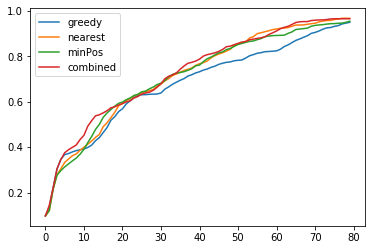

In [17]:
plt.plot(greedy_mean, label='greedy')
plt.plot(nearest_mean, label='nearest')
plt.plot(minPos_mean, label='minPos')
plt.plot(combined_mean, label='combined')
plt.legend()
plt.show()

In [18]:
graph = greedy_plottable
greedy_min = np.min(graph[:,1:-1], axis=1)
greedy_overall_min = greedy_min[-1]
greedy_max = np.max(graph[:,1:-1], axis=1)
greedy_overall_max = greedy_max[-1]
graph = nearest_plottable
nearest_min = np.min(graph[:,1:-1], axis=1)
nearest_overall_min = nearest_min[-1]
nearest_max = np.max(graph[:,1:-1], axis=1)
nearest_overall_max = nearest_max[-1]
graph = minPos_plottable
minPos_min = np.min(graph[:,1:-1], axis=1)
minPos_overall_min = minPos_min[-1]
minPos_max = np.max(graph[:,1:-1], axis=1)
minPos_overall_max = minPos_max[-1]
graph = combined_plottable
combined_min = np.min(graph[:,1:-1], axis=1)
combined_overall_min = combined_min[-1]
combined_max = np.max(graph[:,1:-1], axis=1)
combined_overall_max = combined_max[-1]

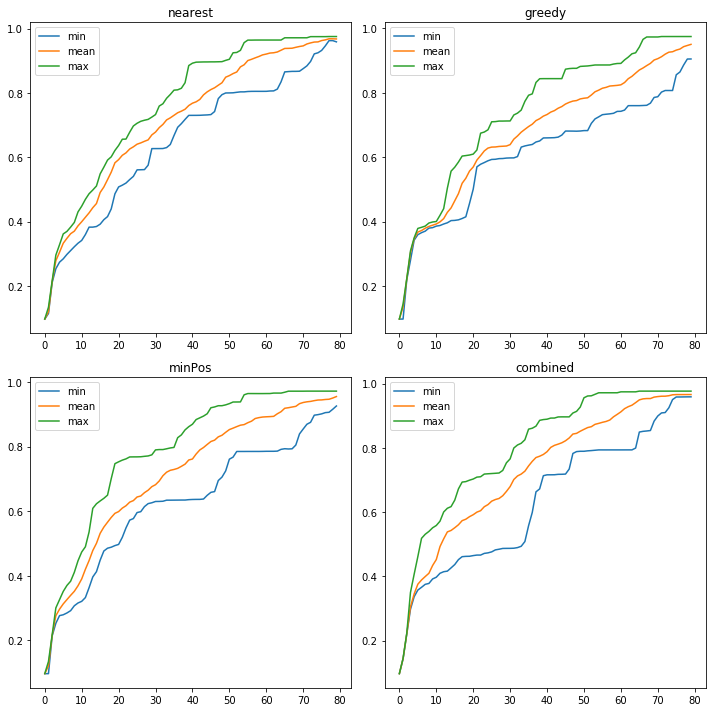

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_min, label='min')
ax1.plot(nearest_mean, label='mean')
ax1.plot(nearest_max, label='max')
ax1.legend()
ax1.set_title('nearest')
ax2.plot(greedy_min, label='min')
ax2.plot(greedy_mean, label='mean')
ax2.plot(greedy_max, label='max')
ax2.legend()
ax2.set_title('greedy')
ax3.plot(minPos_min, label='min')
ax3.plot(minPos_mean, label='mean')
ax3.plot(minPos_max, label='max')
ax3.legend()
ax3.set_title('minPos')
ax4.plot(combined_min, label='min')
ax4.plot(combined_mean, label='mean')
ax4.plot(combined_max, label='max')
ax4.legend()
ax4.set_title('combined')
fig.set_size_inches(10, 10)
fig.tight_layout()

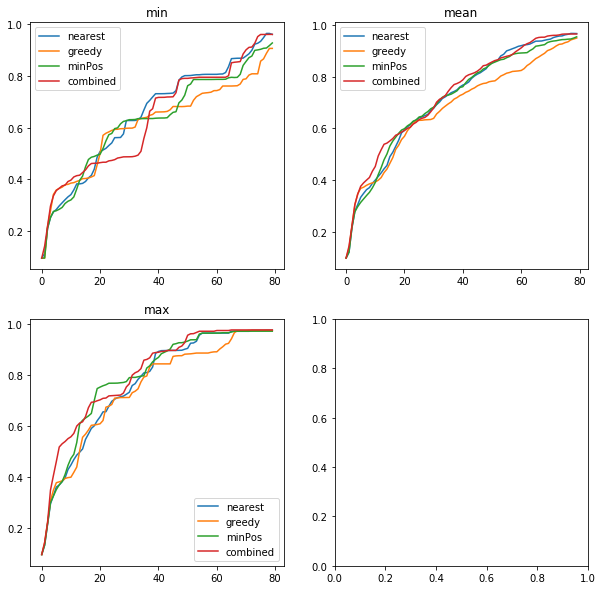

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_min, label='nearest')
ax1.plot(greedy_min, label='greedy')
ax1.plot(minPos_min, label='minPos')
ax1.plot(combined_min, label='combined')
ax1.legend()
ax1.set_title('min')
ax2.plot(nearest_mean, label='nearest')
ax2.plot(greedy_mean, label='greedy')
ax2.plot(minPos_mean, label='minPos')
ax2.plot(combined_mean, label='combined')
ax2.legend()
ax2.set_title('mean')
ax3.plot(nearest_max, label='nearest')
ax3.plot(greedy_max, label='greedy')
ax3.plot(minPos_max, label='minPos')
ax3.plot(combined_max, label='combined')
ax3.legend()
ax3.set_title('max')
fig.set_size_inches(10, 10)


In [21]:
nearest_distances, nearest_counting, nearest_distances_sum, nearest_counting_sum = matrix_splice(nearest_distance_plottable, 2)
greedy_distances, greedy_counting, greedy_distances_sum, greedy_counting_sum = matrix_splice(greedy_distance_plottable, 2)
minPos_distances, minPos_counting, minPos_distances_sum, minPos_counting_sum = matrix_splice(minPos_distance_plottable, 2)
combined_distances, combined_counting, combined_distances_sum, combined_counting_sum = matrix_splice(combined_distance_plottable, 2)
nearest_distances_sum_mean = np.mean(nearest_distances_sum[:, 1:11], axis=1)
greedy_distances_sum_mean = np.mean(greedy_distances_sum[:, 1:11], axis=1)
minPos_distances_sum_mean = np.mean(minPos_distances_sum[:, 1:11], axis=1)
combined_distances_sum_mean = np.mean(combined_distances_sum[:, 1:11], axis=1)
nearest_counting_sum_mean = np.mean(nearest_counting_sum[:, 1:-1], axis=1)
greedy_counting_sum_mean = np.mean(greedy_counting_sum[:, 1:-1], axis=1)
minPos_counting_sum_mean = np.mean(minPos_counting_sum[:, 1:-1], axis=1)
combined_counting_sum_mean = np.mean(combined_counting_sum[:, 1:-1], axis=1)
nearest_distances_mean = np.mean(nearest_distances[:, 1:-1], axis=1)
greedy_distances_mean = np.mean(greedy_distances[:, 1:-1], axis=1)
minPos_distances_mean = np.mean(minPos_distances[:, 1:-1], axis=1)
combined_distances_mean = np.mean(combined_distances[:, 1:-1], axis=1)
nearest_counting_mean = np.mean(nearest_counting[:, 1:-1], axis=1)
greedy_counting_mean = np.mean(greedy_counting[:, 1:-1], axis=1)
minPos_counting_mean = np.mean(minPos_counting[:, 1:-1], axis=1)
combined_counting_mean = np.mean(combined_counting[:, 1:-1], axis=1)

In [22]:
nearest_distances_sum_median = np.median(nearest_distances_sum[:, 1:-1], axis=1)
greedy_distances_sum_median = np.median(greedy_distances_sum[:, 1:-1], axis=1)
minPos_distances_sum_median = np.median(minPos_distances_sum[:, 1:-1], axis=1)
combined_distances_sum_median = np.median(combined_distances_sum[:, 1:-1], axis=1)
nearest_counting_sum_median = np.median(nearest_counting_sum[:, 1:-1], axis=1)
greedy_counting_sum_median = np.median(greedy_counting_sum[:, 1:-1], axis=1)
minPos_counting_sum_median = np.median(minPos_counting_sum[:, 1:-1], axis=1)
combined_counting_sum_median = np.median(combined_counting_sum[:, 1:-1], axis=1)
nearest_distances_median = np.median(nearest_distances[:, 1:-1], axis=1)
greedy_distances_median = np.median(greedy_distances[:, 1:-1], axis=1)
minPos_distances_median = np.median(minPos_distances[:, 1:-1], axis=1)
combined_distances_median = np.median(combined_distances[:, 1:-1], axis=1)
nearest_counting_median = np.median(nearest_counting[:, 1:-1], axis=1)
greedy_counting_median = np.median(greedy_counting[:, 1:-1], axis=1)
minPos_counting_median = np.median(minPos_counting[:, 1:-1], axis=1)
combined_counting_median = np.median(combined_counting[:, 1:-1], axis=1)

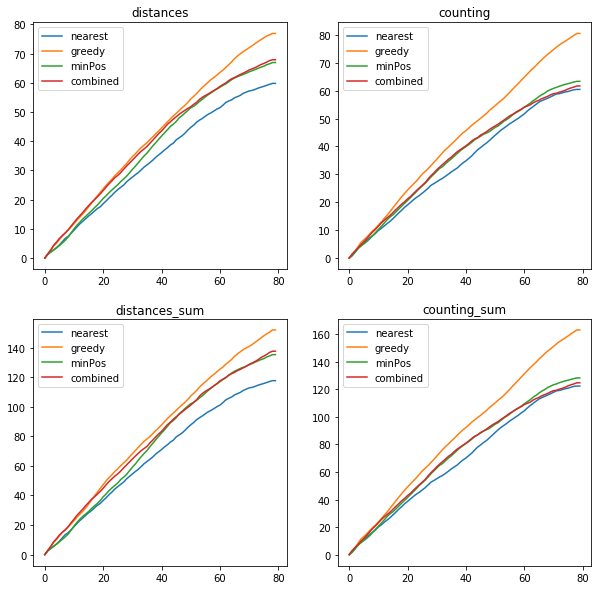

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_mean, label='nearest')
ax1.plot(greedy_distances_mean, label='greedy')
ax1.plot(minPos_distances_mean, label='minPos')
ax1.plot(combined_distances_mean, label='combined')
ax1.legend()
ax1.set_title('distances')
ax2.plot(nearest_counting_mean, label='nearest')
ax2.plot(greedy_counting_mean, label='greedy')
ax2.plot(minPos_counting_mean, label='minPos')
ax2.plot(combined_counting_mean, label='combined')
ax2.legend()
ax2.set_title('counting')
ax3.plot(nearest_distances_sum_mean, label='nearest')
ax3.plot(greedy_distances_sum_mean, label='greedy')
ax3.plot(minPos_distances_sum_mean, label='minPos')
ax3.plot(combined_distances_sum_mean, label='combined')
ax3.legend()
ax3.set_title('distances_sum')
ax4.plot(nearest_counting_sum_mean, label='nearest')
ax4.plot(greedy_counting_sum_mean, label='greedy')
ax4.plot(minPos_counting_sum_mean, label='minPos')
ax4.plot(combined_counting_sum_mean, label='combined')
ax4.legend()
ax4.set_title('counting_sum')
fig.set_size_inches(10, 10)

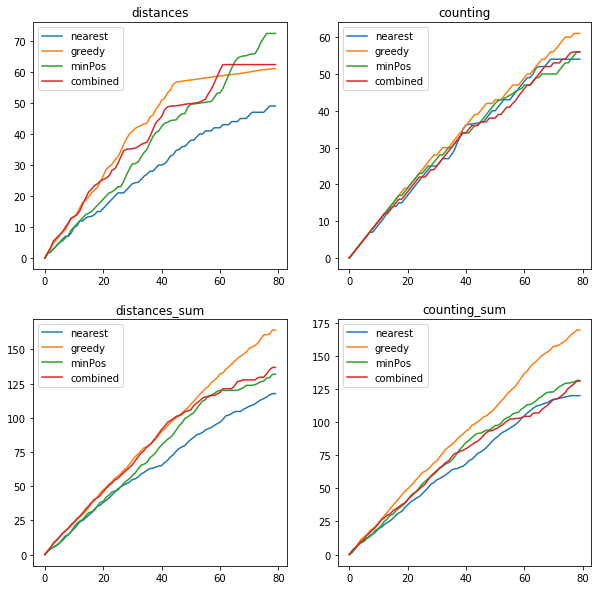

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_median, label='nearest')
ax1.plot(greedy_distances_median, label='greedy')
ax1.plot(minPos_distances_median, label='minPos')
ax1.plot(combined_distances_median, label='combined')
ax1.legend()
ax1.set_title('distances')
ax2.plot(nearest_counting_median, label='nearest')
ax2.plot(greedy_counting_median, label='greedy')
ax2.plot(minPos_counting_median, label='minPos')
ax2.plot(combined_counting_median, label='combined')
ax2.legend()
ax2.set_title('counting')
ax3.plot(nearest_distances_sum_median, label='nearest')
ax3.plot(greedy_distances_sum_median, label='greedy')
ax3.plot(minPos_distances_sum_median, label='minPos')
ax3.plot(combined_distances_sum_median, label='combined')
ax3.legend()
ax3.set_title('distances_sum')
ax4.plot(nearest_counting_sum_median, label='nearest')
ax4.plot(greedy_counting_sum_median, label='greedy')
ax4.plot(minPos_counting_sum_median, label='minPos')
ax4.plot(combined_counting_sum_median, label='combined')
ax4.legend()
ax4.set_title('counting_sum')
fig.set_size_inches(10, 10)

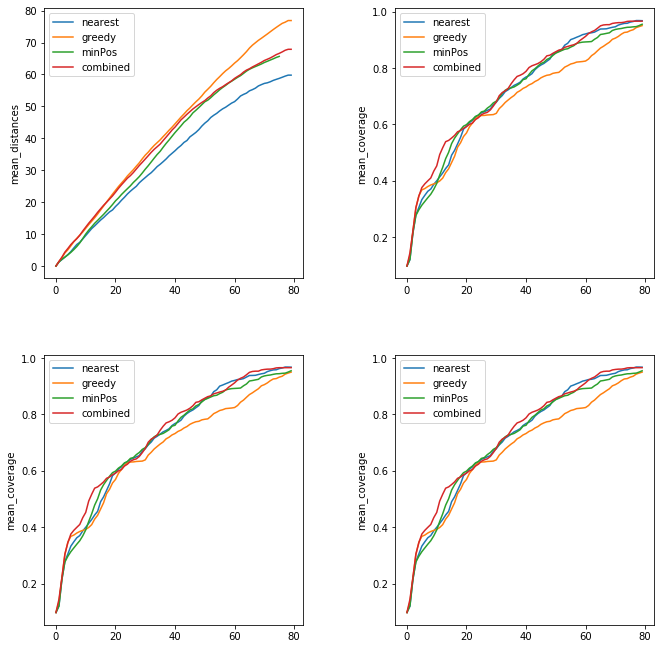

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_mean, label='nearest')
ax1.plot(greedy_distances_mean, label='greedy')
ax1.plot(minPos_distances_mean[:-4], label='minPos')
ax1.plot(combined_distances_mean, label='combined')
ax1.set_ylabel('mean_distances')
ax1.legend()
ax2.plot(nearest_mean, label='nearest')
ax2.plot(greedy_mean, label='greedy')
ax2.plot(minPos_mean, label='minPos')
ax2.plot(combined_mean, label='combined')
ax2.set_ylabel('mean_coverage')
ax2.legend()
ax3.plot(nearest_mean, label='nearest')
ax3.plot(greedy_mean, label='greedy')
ax3.plot(minPos_mean, label='minPos')
ax3.plot(combined_mean, label='combined')
ax3.set_ylabel('mean_coverage')
ax3.legend()
ax4.plot(nearest_mean, label='nearest')
ax4.plot(greedy_mean, label='greedy')
ax4.plot(minPos_mean, label='minPos')
ax4.plot(combined_mean, label='combined')
ax4.set_ylabel('mean_coverage')
ax4.legend()
fig.tight_layout()
fig.set_size_inches(10, 10)
plt.show()

TODO:
  - plots for multiple robots
  - plots for different scenarios
  - plots with ratios of distance to coverage or sth similar

In [26]:
try:
    os.chdir('../../v2_maze_temp/coverage/3')
except:
    os.chdir('../../../v2_maze_temp/coverage/3')

matrix_coverage_greedy_3 = []
matrix_coverage_minPos_3 = []
matrix_coverage_combined_3 = []
matrix_coverage_nearest_3 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_3.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_3.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_3.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_3.append(np.loadtxt(file_path))

matrix_coverage_nearest_3 = np.array(matrix_coverage_nearest_3)
matrix_coverage_greedy_3 = np.array(matrix_coverage_greedy_3)
matrix_coverage_minPos_3 = np.array(matrix_coverage_minPos_3)
matrix_coverage_combined_3 = np.array(matrix_coverage_combined_3)
print(matrix_coverage_nearest_3.shape)
print(matrix_coverage_greedy_3.shape)
print(matrix_coverage_minPos_3.shape)
print(matrix_coverage_combined_3.shape)

(21,)
(21,)
(21,)
(21,)


In [27]:
os.chdir('../../../v2_maze_temp/distances/3')

matrix_distance_greedy_3 = []
matrix_distance_minPos_3 = []
matrix_distance_combined_3 = []
matrix_distance_nearest_3 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_3.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_3.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_3.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_3.append(np.loadtxt(file_path))

matrix_distance_nearest_3 = np.array(matrix_distance_nearest_3)
matrix_distance_greedy_3 = np.array(matrix_distance_greedy_3)
matrix_distance_minPos_3 = np.array(matrix_distance_minPos_3)
matrix_distance_combined_3 = np.array(matrix_distance_combined_3)
print(matrix_distance_nearest_3.shape)
print(matrix_distance_greedy_3.shape)
print(matrix_distance_minPos_3.shape)
print(matrix_distance_combined_3.shape)

(21,)
(21,)
(23,)
(21,)


In [28]:
nearest_coverage_plottable_3, nearest_distance_plottable_3, nearest_time_taken_3 = matrix_builder(matrix_coverage_nearest_3, matrix_distance_nearest_3)
greedy_coverage_plottable_3, greedy_distance_plottable_3, greedy_time_taken_3 = matrix_builder(matrix_coverage_greedy_3, matrix_distance_greedy_3)
minPos_coverage_plottable_3, minPos_distance_plottable_3, minPos_time_taken_3 = matrix_builder(matrix_coverage_minPos_3, matrix_distance_minPos_3)
combined_coverage_plottable_3, combined_distance_plottable_3, combined_time_taken_3 = matrix_builder(matrix_coverage_combined_3, matrix_distance_combined_3)

In [29]:
values_maze_3_nearest = min_mean_max_extraction(nearest_time_taken_3[1:11])
values_maze_3_greedy = min_mean_max_extraction(greedy_time_taken_3[1:11])
values_maze_3_minPos = min_mean_max_extraction(minPos_time_taken_3[1:11])
values_maze_3_combined = min_mean_max_extraction(combined_time_taken_3[1:11])
values_maze_3 = [[values_maze_3_nearest], [values_maze_3_greedy], [values_maze_3_minPos], [values_maze_3_combined]]
values_maze_3

[[array([44. , 56.6, 70. ])],
 [array([57. , 65.6, 70. ])],
 [array([35. , 49.4, 56. ])],
 [array([34. , 45.3, 63. ])]]

In [30]:
print(nearest_coverage_plottable_3.shape)
print(greedy_coverage_plottable_3.shape)
print(minPos_coverage_plottable_3.shape)
print(combined_coverage_plottable_3.shape)
print(nearest_distance_plottable_3.shape)
print(greedy_distance_plottable_3.shape)
print(minPos_distance_plottable_3.shape)
print(combined_distance_plottable_3.shape)

(80, 20)
(80, 12)
(80, 13)
(80, 16)
(80, 120)
(80, 72)
(80, 78)
(80, 96)


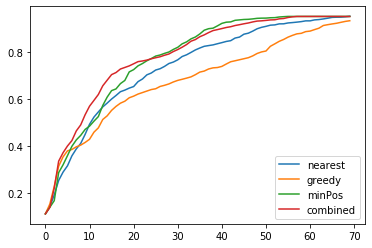

In [31]:
nearest_mean_3= np.mean(nearest_coverage_plottable_3[:70,1:11], axis=1)
greedy_mean_3= np.mean(greedy_coverage_plottable_3[:70,1:11], axis=1)
minPos_mean_3= np.mean(minPos_coverage_plottable_3[:70,1:11], axis=1)
combined_mean_3= np.mean(combined_coverage_plottable_3[:70,1:11], axis=1)
plt.plot(nearest_mean_3, label='nearest')
plt.plot(greedy_mean_3, label='greedy')
plt.plot(minPos_mean_3, label='minPos')
plt.plot(combined_mean_3, label='combined')
plt.legend()
plt.show()

In [32]:
nearest_distances_3, nearest_counting_3, nearest_distances_3_sum, nearest_counting_3_sum = matrix_splice(nearest_distance_plottable_3, 3)
greedy_distances_3, greedy_counting_3, greedy_distances_3_sum, greedy_counting_3_sum = matrix_splice(greedy_distance_plottable_3, 3)
minPos_distances_3, minPos_counting_3, minPos_distances_3_sum, minPos_counting_3_sum = matrix_splice(minPos_distance_plottable_3, 3)
combined_distances_3, combined_counting_3, combined_distances_3_sum, combined_counting_3_sum = matrix_splice(combined_distance_plottable_3, 3)
nearest_distances_3_sum_mean = np.mean(nearest_distances_3_sum[:, 1:11], axis=1)
greedy_distances_3_sum_mean = np.mean(greedy_distances_3_sum[:, 1:11], axis=1)
minPos_distances_3_sum_mean = np.mean(minPos_distances_3_sum[:, 1:11], axis=1)
combined_distances_3_sum_mean = np.mean(combined_distances_3_sum[:, 1:11], axis=1)
nearest_counting_3_sum_mean = np.mean(nearest_counting_3_sum[:, 1:-1], axis=1)
greedy_counting_3_sum_mean = np.mean(greedy_counting_3_sum[:, 1:-1], axis=1)
minPos_counting_3_sum_mean = np.mean(minPos_counting_3_sum[:, 1:-1], axis=1)
combined_counting_3_sum_mean = np.mean(combined_counting_3_sum[:, 1:-1], axis=1)
nearest_distances_3_mean = np.mean(nearest_distances_3[:, 1:-1], axis=1)
greedy_distances_3_mean = np.mean(greedy_distances_3[:, 1:-1], axis=1)
minPos_distances_3_mean = np.mean(minPos_distances_3[:, 1:-1], axis=1)
combined_distances_3_mean = np.mean(combined_distances_3[:, 1:-1], axis=1)
nearest_counting_3_mean = np.mean(nearest_counting_3[:, 1:-1], axis=1)
greedy_counting_3_mean = np.mean(greedy_counting_3[:, 1:-1], axis=1)
minPos_counting_3_mean = np.mean(minPos_counting_3[:, 1:-1], axis=1)
combined_counting_3_mean = np.mean(combined_counting_3[:, 1:-1], axis=1)
nearest_distances_3_sum_median = np.median(nearest_distances_3_sum[:, 1:-1], axis=1)
greedy_distances_3_sum_median = np.median(greedy_distances_3_sum[:, 1:-1], axis=1)
minPos_distances_3_sum_median = np.median(minPos_distances_3_sum[:, 1:-1], axis=1)
combined_distances_3_sum_median = np.median(combined_distances_3_sum[:, 1:-1], axis=1)
nearest_counting_3_sum_median = np.median(nearest_counting_3_sum[:, 1:-1], axis=1)
greedy_counting_3_sum_median = np.median(greedy_counting_3_sum[:, 1:-1], axis=1)
minPos_counting_3_sum_median = np.median(minPos_counting_3_sum[:, 1:-1], axis=1)
combined_counting_3_sum_median = np.median(combined_counting_3_sum[:, 1:-1], axis=1)
nearest_distances_3_median = np.median(nearest_distances_3[:, 1:-1], axis=1)
greedy_distances_3_median = np.median(greedy_distances_3[:, 1:-1], axis=1)
minPos_distances_3_median = np.median(minPos_distances_3[:, 1:-1], axis=1)
combined_distances_3_median = np.median(combined_distances_3[:, 1:-1], axis=1)
nearest_counting_3_median = np.median(nearest_counting_3[:, 1:-1], axis=1)
greedy_counting_3_median = np.median(greedy_counting_3[:, 1:-1], axis=1)
minPos_counting_3_median = np.median(minPos_counting_3[:, 1:-1], axis=1)
combined_counting_3_median = np.median(combined_counting_3[:, 1:-1], axis=1)

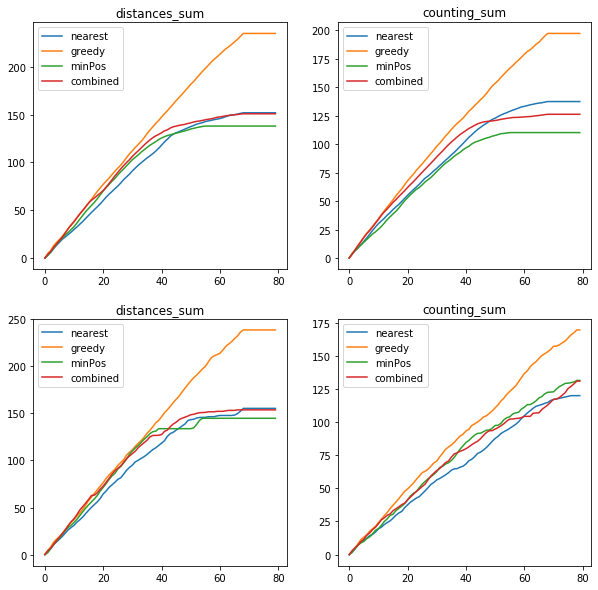

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_3_sum_mean, label='nearest')
ax1.plot(greedy_distances_3_sum_mean, label='greedy')
ax1.plot(minPos_distances_3_sum_mean, label='minPos')
ax1.plot(combined_distances_3_sum_mean, label='combined')
ax1.legend()
ax1.set_title('distances_sum')
ax2.plot(nearest_counting_3_sum_mean, label='nearest')
ax2.plot(greedy_counting_3_sum_mean, label='greedy')
ax2.plot(minPos_counting_3_sum_mean, label='minPos')
ax2.plot(combined_counting_3_sum_mean, label='combined')
ax2.legend()
ax2.set_title('counting_sum')
ax3.plot(nearest_distances_3_sum_median, label='nearest')
ax3.plot(greedy_distances_3_sum_median, label='greedy')
ax3.plot(minPos_distances_3_sum_median, label='minPos')
ax3.plot(combined_distances_3_sum_median, label='combined')
ax3.legend()
ax3.set_title('distances_sum')
ax4.plot(nearest_counting_sum_median, label='nearest')
ax4.plot(greedy_counting_sum_median, label='greedy')
ax4.plot(minPos_counting_sum_median, label='minPos')
ax4.plot(combined_counting_sum_median, label='combined')
ax4.legend()
ax4.set_title('counting_sum')
fig.set_size_inches(10, 10)

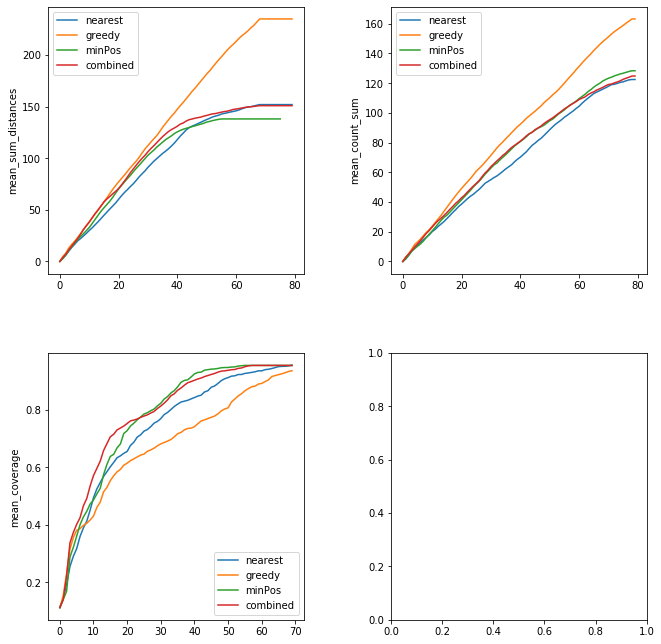

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_3_sum_mean, label='nearest')
ax1.plot(greedy_distances_3_sum_mean, label='greedy')
ax1.plot(minPos_distances_3_sum_mean[:-4], label='minPos')
ax1.plot(combined_distances_3_sum_mean, label='combined')
ax1.set_ylabel('mean_sum_distances')
ax1.legend()
ax2.plot(nearest_counting_sum_mean, label='nearest')
ax2.plot(greedy_counting_sum_mean, label='greedy')
ax2.plot(minPos_counting_sum_mean, label='minPos')
ax2.plot(combined_counting_sum_mean, label='combined')
ax2.set_ylabel('mean_count_sum')
ax2.legend()
ax3.plot(nearest_mean_3, label='nearest')
ax3.plot(greedy_mean_3, label='greedy')
ax3.plot(minPos_mean_3, label='minPos')
ax3.plot(combined_mean_3, label='combined')
ax3.set_ylabel('mean_coverage')
ax3.legend()
fig.tight_layout()
fig.set_size_inches(10, 10)
plt.show()

(21,)
(31,)
(21,)
(21,)
(21,)
(32,)
(22,)
(21,)
(80, 12)
(80, 14)
(80, 16)
(80, 18)
(80, 96)
(80, 112)
(80, 128)
(80, 144)


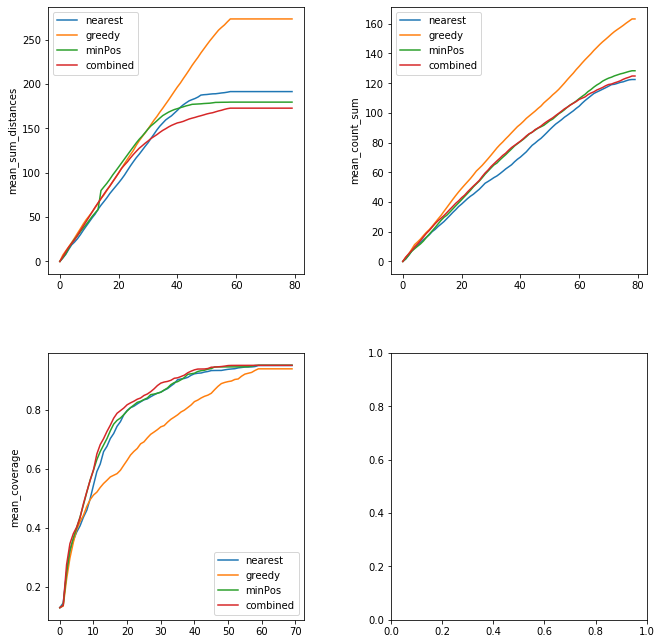

In [35]:
try:
    os.chdir('../../v2_maze_temp/coverage/4')
except:
    os.chdir('../../../v2_maze_temp/coverage/4')

matrix_coverage_greedy_4 = []
matrix_coverage_minPos_4 = []
matrix_coverage_combined_4 = []
matrix_coverage_nearest_4 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_4.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_4.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_4.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_4.append(np.loadtxt(file_path))

matrix_coverage_nearest_4 = np.array(matrix_coverage_nearest_4)
matrix_coverage_greedy_4 = np.array(matrix_coverage_greedy_4)
matrix_coverage_minPos_4 = np.array(matrix_coverage_minPos_4)
matrix_coverage_combined_4 = np.array(matrix_coverage_combined_4)
print(matrix_coverage_nearest_4.shape)
print(matrix_coverage_greedy_4.shape)
print(matrix_coverage_minPos_4.shape)
print(matrix_coverage_combined_4.shape)

os.chdir('../../../v2_maze_temp/distances/4')

matrix_distance_greedy_4 = []
matrix_distance_minPos_4 = []
matrix_distance_combined_4 = []
matrix_distance_nearest_4 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_4.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_4.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_4.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_4.append(np.loadtxt(file_path))

matrix_distance_nearest_4 = np.array(matrix_distance_nearest_4)
matrix_distance_greedy_4 = np.array(matrix_distance_greedy_4)
matrix_distance_minPos_4 = np.array(matrix_distance_minPos_4)
matrix_distance_combined_4 = np.array(matrix_distance_combined_4)
print(matrix_distance_nearest_4.shape)
print(matrix_distance_greedy_4.shape)
print(matrix_distance_minPos_4.shape)
print(matrix_distance_combined_4.shape)

nearest_coverage_plottable_4, nearest_distance_plottable_4, nearest_time_taken_4 = matrix_builder(matrix_coverage_nearest_4, matrix_distance_nearest_4)
greedy_coverage_plottable_4, greedy_distance_plottable_4, greedy_time_taken_4 = matrix_builder(matrix_coverage_greedy_4, matrix_distance_greedy_4)
minPos_coverage_plottable_4, minPos_distance_plottable_4, minPos_time_taken_4 = matrix_builder(matrix_coverage_minPos_4, matrix_distance_minPos_4)
combined_coverage_plottable_4, combined_distance_plottable_4, combined_time_taken_4 = matrix_builder(matrix_coverage_combined_4, matrix_distance_combined_4)

values_maze_4_nearest = min_mean_max_extraction(nearest_time_taken_4[1:11])
values_maze_4_greedy = min_mean_max_extraction(greedy_time_taken_4[1:11])
values_maze_4_minPos = min_mean_max_extraction(minPos_time_taken_4[1:11])
values_maze_4_combined = min_mean_max_extraction(combined_time_taken_4[1:11])
values_maze_4 = [[values_maze_4_nearest], [values_maze_4_greedy], [values_maze_4_minPos], [values_maze_4_combined]]

print(nearest_coverage_plottable_4.shape)
print(greedy_coverage_plottable_4.shape)
print(minPos_coverage_plottable_4.shape)
print(combined_coverage_plottable_4.shape)
print(nearest_distance_plottable_4.shape)
print(greedy_distance_plottable_4.shape)
print(minPos_distance_plottable_4.shape)
print(combined_distance_plottable_4.shape)

nearest_mean_4= np.mean(nearest_coverage_plottable_4[:70,1:11], axis=1)
greedy_mean_4= np.mean(greedy_coverage_plottable_4[:70,1:11], axis=1)
minPos_mean_4= np.mean(minPos_coverage_plottable_4[:70,1:11], axis=1)
combined_mean_4= np.mean(combined_coverage_plottable_4[:70,1:11], axis=1)

nearest_distances_4, nearest_counting_4, nearest_distances_4_sum, nearest_counting_4_sum = matrix_splice(nearest_distance_plottable_4, 4)
greedy_distances_4, greedy_counting_4, greedy_distances_4_sum, greedy_counting_4_sum = matrix_splice(greedy_distance_plottable_4, 4)
minPos_distances_4, minPos_counting_4, minPos_distances_4_sum, minPos_counting_4_sum = matrix_splice(minPos_distance_plottable_4, 4)
combined_distances_4, combined_counting_4, combined_distances_4_sum, combined_counting_4_sum = matrix_splice(combined_distance_plottable_4, 4)
nearest_distances_4_sum_mean = np.mean(nearest_distances_4_sum[:, 1:-1], axis=1)
greedy_distances_4_sum_mean = np.mean(greedy_distances_4_sum[:, 1:-1], axis=1)
minPos_distances_4_sum_mean = np.mean(minPos_distances_4_sum[:, 1:-1], axis=1)
combined_distances_4_sum_mean = np.mean(combined_distances_4_sum[:, 1:-1], axis=1)
nearest_counting_4_sum_mean = np.mean(nearest_counting_4_sum[:, 1:-1], axis=1)
greedy_counting_4_sum_mean = np.mean(greedy_counting_4_sum[:, 1:-1], axis=1)
minPos_counting_4_sum_mean = np.mean(minPos_counting_4_sum[:, 1:-1], axis=1)
combined_counting_4_sum_mean = np.mean(combined_counting_4_sum[:, 1:-1], axis=1)
nearest_distances_4_mean = np.mean(nearest_distances_4[:, 1:-1], axis=1)
greedy_distances_4_mean = np.mean(greedy_distances_4[:, 1:-1], axis=1)
minPos_distances_4_mean = np.mean(minPos_distances_4[:, 1:-1], axis=1)
combined_distances_4_mean = np.mean(combined_distances_4[:, 1:-1], axis=1)
nearest_counting_4_mean = np.mean(nearest_counting_4[:, 1:-1], axis=1)
greedy_counting_4_mean = np.mean(greedy_counting_4[:, 1:-1], axis=1)
minPos_counting_4_mean = np.mean(minPos_counting_4[:, 1:-1], axis=1)
combined_counting_4_mean = np.mean(combined_counting_4[:, 1:-1], axis=1)
nearest_distances_4_sum_median = np.median(nearest_distances_4_sum[:, 1:-1], axis=1)
greedy_distances_4_sum_median = np.median(greedy_distances_4_sum[:, 1:-1], axis=1)
minPos_distances_4_sum_median = np.median(minPos_distances_4_sum[:, 1:-1], axis=1)
combined_distances_4_sum_median = np.median(combined_distances_4_sum[:, 1:-1], axis=1)
nearest_counting_4_sum_median = np.median(nearest_counting_4_sum[:, 1:-1], axis=1)
greedy_counting_4_sum_median = np.median(greedy_counting_4_sum[:, 1:-1], axis=1)
minPos_counting_4_sum_median = np.median(minPos_counting_4_sum[:, 1:-1], axis=1)
combined_counting_4_sum_median = np.median(combined_counting_4_sum[:, 1:-1], axis=1)
nearest_distances_4_median = np.median(nearest_distances_4[:, 1:-1], axis=1)
greedy_distances_4_median = np.median(greedy_distances_4[:, 1:-1], axis=1)
minPos_distances_4_median = np.median(minPos_distances_4[:, 1:-1], axis=1)
combined_distances_4_median = np.median(combined_distances_4[:, 1:-1], axis=1)
nearest_counting_4_median = np.median(nearest_counting_4[:, 1:-1], axis=1)
greedy_counting_4_median = np.median(greedy_counting_4[:, 1:-1], axis=1)
minPos_counting_4_median = np.median(minPos_counting_4[:, 1:-1], axis=1)
combined_counting_4_median = np.median(combined_counting_4[:, 1:-1], axis=1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_4_sum_mean, label='nearest')
ax1.plot(greedy_distances_4_sum_mean, label='greedy')
ax1.plot(minPos_distances_4_sum_mean, label='minPos')
ax1.plot(combined_distances_4_sum_mean, label='combined')
ax1.set_ylabel('mean_sum_distances')
ax1.legend()
ax2.plot(nearest_counting_sum_mean, label='nearest')
ax2.plot(greedy_counting_sum_mean, label='greedy')
ax2.plot(minPos_counting_sum_mean, label='minPos')
ax2.plot(combined_counting_sum_mean, label='combined')
ax2.set_ylabel('mean_count_sum')
ax2.legend()
ax3.plot(nearest_mean_4, label='nearest')
ax3.plot(greedy_mean_4, label='greedy')
ax3.plot(minPos_mean_4, label='minPos')
ax3.plot(combined_mean_4, label='combined')
ax3.set_ylabel('mean_coverage')
ax3.legend()
fig.tight_layout()
fig.set_size_inches(10, 10)
plt.show()

In [36]:
try:
    os.chdir('../../v2_maze_temp/coverage/5')
except:
    os.chdir('../../../v2_maze_temp/coverage/5')

matrix_coverage_greedy_5 = []
matrix_coverage_minPos_5 = []
matrix_coverage_combined_5 = []
matrix_coverage_nearest_5 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_5.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_5.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_5.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_5.append(np.loadtxt(file_path))

matrix_coverage_nearest_5 = np.array(matrix_coverage_nearest_5)
matrix_coverage_greedy_5 = np.array(matrix_coverage_greedy_5)
matrix_coverage_minPos_5 = np.array(matrix_coverage_minPos_5)
matrix_coverage_combined_5 = np.array(matrix_coverage_combined_5)
print(matrix_coverage_nearest_5.shape)
print(matrix_coverage_greedy_5.shape)
print(matrix_coverage_minPos_5.shape)
print(matrix_coverage_combined_5.shape)

os.chdir('../../../v2_maze_temp/distances/5')

matrix_distance_greedy_5 = []
matrix_distance_minPos_5 = []
matrix_distance_combined_5 = []
matrix_distance_nearest_5 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_5.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_5.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_5.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_5.append(np.loadtxt(file_path))

matrix_distance_nearest_5 = np.array(matrix_distance_nearest_5)
matrix_distance_greedy_5 = np.array(matrix_distance_greedy_5)
matrix_distance_minPos_5 = np.array(matrix_distance_minPos_5)
matrix_distance_combined_5 = np.array(matrix_distance_combined_5)
print(matrix_distance_nearest_5.shape)
print(matrix_distance_greedy_5.shape)
print(matrix_distance_minPos_5.shape)
print(matrix_distance_combined_5.shape)

nearest_coverage_plottable_5, nearest_distance_plottable_5, nearest_time_taken_5 = matrix_builder(matrix_coverage_nearest_5, matrix_distance_nearest_5)
greedy_coverage_plottable_5, greedy_distance_plottable_5, greedy_time_taken_5 = matrix_builder(matrix_coverage_greedy_5, matrix_distance_greedy_5)
minPos_coverage_plottable_5, minPos_distance_plottable_5, minPos_time_taken_5 = matrix_builder(matrix_coverage_minPos_5, matrix_distance_minPos_5)
combined_coverage_plottable_5, combined_distance_plottable_5, combined_time_taken_5 = matrix_builder(matrix_coverage_combined_5, matrix_distance_combined_5)

values_maze_5_nearest = min_mean_max_extraction(nearest_time_taken_5)
values_maze_5_greedy = min_mean_max_extraction(greedy_time_taken_5)
values_maze_5_minPos = min_mean_max_extraction(minPos_time_taken_5)
values_maze_5_combined = min_mean_max_extraction(combined_time_taken_5)
values_maze_5 = [[values_maze_5_nearest], [values_maze_5_greedy], [values_maze_5_minPos], [values_maze_5_combined]]

(21,)
(31,)
(21,)
(21,)
(21,)
(33,)
(21,)
(21,)


In [37]:
print(nearest_coverage_plottable_5.shape)
print(greedy_coverage_plottable_5.shape)
print(minPos_coverage_plottable_5.shape)
print(combined_coverage_plottable_5.shape)
print(nearest_distance_plottable_5.shape)
print(greedy_distance_plottable_5.shape)
print(minPos_distance_plottable_5.shape)
print(combined_distance_plottable_5.shape)

nearest_mean_5= np.mean(nearest_coverage_plottable_5[:70,1:11], axis=1)
greedy_mean_5= np.mean(greedy_coverage_plottable_5[:70,1:11], axis=1)
minPos_mean_5= np.mean(minPos_coverage_plottable_5[:70,1:11], axis=1)
combined_mean_5= np.mean(combined_coverage_plottable_5[:70,1:11], axis=1)

nearest_distances_5, nearest_counting_5, nearest_distances_5_sum, nearest_counting_5_sum = matrix_splice(nearest_distance_plottable_5, 5)
greedy_distances_5, greedy_counting_5, greedy_distances_5_sum, greedy_counting_5_sum = matrix_splice(greedy_distance_plottable_5, 5)
minPos_distances_5, minPos_counting_5, minPos_distances_5_sum, minPos_counting_5_sum = matrix_splice(minPos_distance_plottable_5, 5)
combined_distances_5, combined_counting_5, combined_distances_5_sum, combined_counting_5_sum = matrix_splice(combined_distance_plottable_5, 5)
nearest_distances_5_sum_mean = np.mean(nearest_distances_5_sum[:, 1:11], axis=1)
greedy_distances_5_sum_mean = np.mean(greedy_distances_5_sum[:, 1:11], axis=1)
minPos_distances_5_sum_mean = np.mean(minPos_distances_5_sum[:, 1:11], axis=1)
combined_distances_5_sum_mean = np.mean(combined_distances_5_sum[:, 1:11], axis=1)
nearest_counting_5_sum_mean = np.mean(nearest_counting_5_sum[:, 1:10], axis=1)
greedy_counting_5_sum_mean = np.mean(greedy_counting_5_sum[:, 1:10], axis=1)
minPos_counting_5_sum_mean = np.mean(minPos_counting_5_sum[:, 1:10], axis=1)
combined_counting_5_sum_mean = np.mean(combined_counting_5_sum[:, 1:10], axis=1)
nearest_distances_5_mean = np.mean(nearest_distances_5[:, 1:10], axis=1)
greedy_distances_5_mean = np.mean(greedy_distances_5[:, 1:10], axis=1)
minPos_distances_5_mean = np.mean(minPos_distances_5[:, 1:10], axis=1)
combined_distances_5_mean = np.mean(combined_distances_5[:, 1:10], axis=1)
nearest_counting_5_mean = np.mean(nearest_counting_5[:, 1:10], axis=1)
greedy_counting_5_mean = np.mean(greedy_counting_5[:, 1:10], axis=1)
minPos_counting_5_mean = np.mean(minPos_counting_5[:, 1:10], axis=1)
combined_counting_5_mean = np.mean(combined_counting_5[:, 1:10], axis=1)
nearest_distances_5_sum_median = np.median(nearest_distances_5_sum[:, 1:10], axis=1)
greedy_distances_5_sum_median = np.median(greedy_distances_5_sum[:, 1:10], axis=1)
minPos_distances_5_sum_median = np.median(minPos_distances_5_sum[:, 1:10], axis=1)
combined_distances_5_sum_median = np.median(combined_distances_5_sum[:, 1:10], axis=1)
nearest_counting_5_sum_median = np.median(nearest_counting_5_sum[:, 1:10], axis=1)
greedy_counting_5_sum_median = np.median(greedy_counting_5_sum[:, 1:10], axis=1)
minPos_counting_5_sum_median = np.median(minPos_counting_5_sum[:, 1:10], axis=1)
combined_counting_5_sum_median = np.median(combined_counting_5_sum[:, 1:10], axis=1)
nearest_distances_5_median = np.median(nearest_distances_5[:, 1:10], axis=1)
greedy_distances_5_median = np.median(greedy_distances_5[:, 1:10], axis=1)
minPos_distances_5_median = np.median(minPos_distances_5[:, 1:10], axis=1)
combined_distances_5_median = np.median(combined_distances_5[:, 1:10], axis=1)
nearest_counting_5_median = np.median(nearest_counting_5[:, 1:10], axis=1)
greedy_counting_5_median = np.median(greedy_counting_5[:, 1:10], axis=1)
minPos_counting_5_median = np.median(minPos_counting_5[:, 1:10], axis=1)
combined_counting_5_median = np.median(combined_counting_5[:, 1:10], axis=1)

(80, 19)
(80, 9)
(80, 14)
(80, 16)
(80, 190)
(80, 90)
(80, 140)
(80, 160)


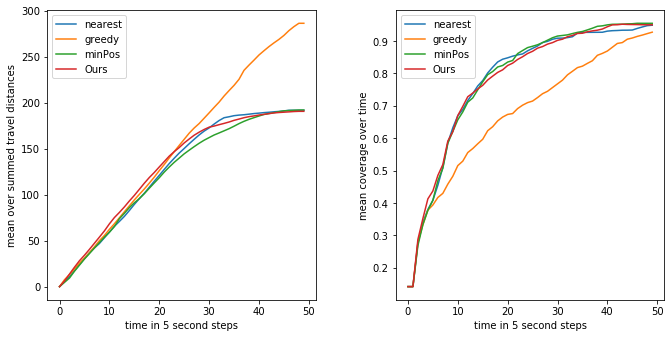

In [38]:
fig, (ax1, ax3) = plt.subplots(1, 2)
ax1.plot(nearest_distances_5_sum_mean[:50], label='nearest')
ax1.plot(greedy_distances_5_sum_mean[:50], label='greedy')
ax1.plot(minPos_distances_5_sum_mean[:50], label='minPos')
ax1.plot(combined_distances_5_sum_mean[:50], label='Ours')
ax1.set_ylabel('mean over summed travel distances')
ax1.set_xlabel('time in 5 second steps')
ax1.legend()
ax3.plot(nearest_mean_5[:50], label='nearest')
ax3.plot(greedy_mean_5[:50], label='greedy')
ax3.plot(minPos_mean_5[:50], label='minPos')
ax3.plot(combined_mean_5[:50], label='Ours')
ax3.set_ylabel('mean coverage over time')
ax3.set_xlabel('time in 5 second steps')
ax3.legend()
fig.tight_layout()
fig.set_size_inches(10, 5)
fig.savefig('test.svg')
plt.show()

(20,)
(20,)
(20,)
(20,)
(21,)
(19,)
(22,)
(21,)
(80, 13)
(80, 20)
(80, 15)
(80, 16)
(80, 52)
(80, 80)
(80, 60)
(80, 64)


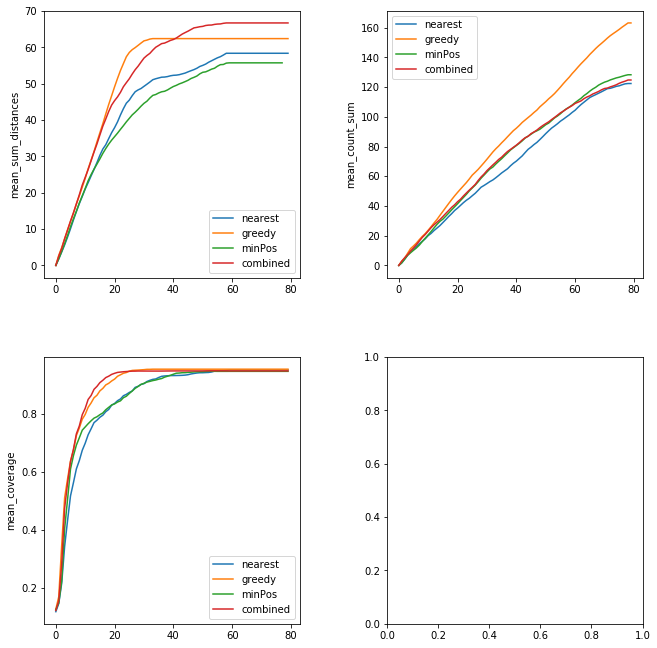

In [39]:
try:
    os.chdir('../../map_3/coverage/2')
except:
    os.chdir('../../../map_3/coverage/2')

matrix_coverage_greedy_2 = []
matrix_coverage_minPos_2 = []
matrix_coverage_combined_2 = []
matrix_coverage_nearest_2 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_2.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_2.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_2.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_2.append(np.loadtxt(file_path))

matrix_coverage_nearest_2 = np.array(matrix_coverage_nearest_2)
matrix_coverage_greedy_2 = np.array(matrix_coverage_greedy_2)
matrix_coverage_minPos_2 = np.array(matrix_coverage_minPos_2)
matrix_coverage_combined_2 = np.array(matrix_coverage_combined_2)
print(matrix_coverage_nearest_2.shape)
print(matrix_coverage_greedy_2.shape)
print(matrix_coverage_minPos_2.shape)
print(matrix_coverage_combined_2.shape)

os.chdir('../../../map_3/distances/2')

matrix_distance_greedy_2 = []
matrix_distance_minPos_2 = []
matrix_distance_combined_2 = []
matrix_distance_nearest_2 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_2.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_2.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_2.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_2.append(np.loadtxt(file_path))

matrix_distance_nearest_2 = np.array(matrix_distance_nearest_2)
matrix_distance_greedy_2 = np.array(matrix_distance_greedy_2)
matrix_distance_minPos_2 = np.array(matrix_distance_minPos_2)
matrix_distance_combined_2 = np.array(matrix_distance_combined_2)
print(matrix_distance_nearest_2.shape)
print(matrix_distance_greedy_2.shape)
print(matrix_distance_minPos_2.shape)
print(matrix_distance_combined_2.shape)

nearest_coverage_plottable_2, nearest_distance_plottable_2, nearest_time_taken_2 = matrix_builder(matrix_coverage_nearest_2, matrix_distance_nearest_2)
greedy_coverage_plottable_2, greedy_distance_plottable_2, greedy_time_taken_2 = matrix_builder(matrix_coverage_greedy_2, matrix_distance_greedy_2)
minPos_coverage_plottable_2, minPos_distance_plottable_2, minPos_time_taken_2 = matrix_builder(matrix_coverage_minPos_2, matrix_distance_minPos_2)
combined_coverage_plottable_2, combined_distance_plottable_2, combined_time_taken_2 = matrix_builder(matrix_coverage_combined_2, matrix_distance_combined_2)

values_map_2_nearest = min_mean_max_extraction(nearest_time_taken_2)
values_map_2_greedy = min_mean_max_extraction(greedy_time_taken_2)
values_map_2_minPos = min_mean_max_extraction(minPos_time_taken_2)
values_map_2_combined = min_mean_max_extraction(combined_time_taken_2)
values_map_2 = [[values_map_2_nearest], [values_map_2_greedy], [values_map_2_minPos], [values_map_2_combined]]

print(nearest_coverage_plottable_2.shape)
print(greedy_coverage_plottable_2.shape)
print(minPos_coverage_plottable_2.shape)
print(combined_coverage_plottable_2.shape)
print(nearest_distance_plottable_2.shape)
print(greedy_distance_plottable_2.shape)
print(minPos_distance_plottable_2.shape)
print(combined_distance_plottable_2.shape)

nearest_mean_2= np.mean(nearest_coverage_plottable_2[:,1:-1], axis=1)
greedy_mean_2= np.mean(greedy_coverage_plottable_2[:,1:-1], axis=1)
minPos_mean_2= np.mean(minPos_coverage_plottable_2[:,1:-1], axis=1)
combined_mean_2= np.mean(combined_coverage_plottable_2[:,1:-1], axis=1)

nearest_distances_2, nearest_counting_2, nearest_distances_2_sum, nearest_counting_2_sum = matrix_splice(nearest_distance_plottable_2, 2)
greedy_distances_2, greedy_counting_2, greedy_distances_2_sum, greedy_counting_2_sum = matrix_splice(greedy_distance_plottable_2, 2)
minPos_distances_2, minPos_counting_2, minPos_distances_2_sum, minPos_counting_2_sum = matrix_splice(minPos_distance_plottable_2, 2)
combined_distances_2, combined_counting_2, combined_distances_2_sum, combined_counting_2_sum = matrix_splice(combined_distance_plottable_2, 2)
nearest_distances_2_sum_mean = np.mean(nearest_distances_2_sum[:, 1:-1], axis=1)
greedy_distances_2_sum_mean = np.mean(greedy_distances_2_sum[:, 1:-1], axis=1)
minPos_distances_2_sum_mean = np.mean(minPos_distances_2_sum[:, 1:-1], axis=1)
combined_distances_2_sum_mean = np.mean(combined_distances_2_sum[:, 1:-1], axis=1)
nearest_counting_2_sum_mean = np.mean(nearest_counting_2_sum[:, 1:-1], axis=1)
greedy_counting_2_sum_mean = np.mean(greedy_counting_2_sum[:, 1:-1], axis=1)
minPos_counting_2_sum_mean = np.mean(minPos_counting_2_sum[:, 1:-1], axis=1)
combined_counting_2_sum_mean = np.mean(combined_counting_2_sum[:, 1:-1], axis=1)
nearest_distances_2_mean = np.mean(nearest_distances_2[:, 1:-1], axis=1)
greedy_distances_2_mean = np.mean(greedy_distances_2[:, 1:-1], axis=1)
minPos_distances_2_mean = np.mean(minPos_distances_2[:, 1:-1], axis=1)
combined_distances_2_mean = np.mean(combined_distances_2[:, 1:-1], axis=1)
nearest_counting_2_mean = np.mean(nearest_counting_2[:, 1:-1], axis=1)
greedy_counting_2_mean = np.mean(greedy_counting_2[:, 1:-1], axis=1)
minPos_counting_2_mean = np.mean(minPos_counting_2[:, 1:-1], axis=1)
combined_counting_2_mean = np.mean(combined_counting_2[:, 1:-1], axis=1)
nearest_distances_2_sum_median = np.median(nearest_distances_2_sum[:, 1:-1], axis=1)
greedy_distances_2_sum_median = np.median(greedy_distances_2_sum[:, 1:-1], axis=1)
minPos_distances_2_sum_median = np.median(minPos_distances_2_sum[:, 1:-1], axis=1)
combined_distances_2_sum_median = np.median(combined_distances_2_sum[:, 1:-1], axis=1)
nearest_counting_2_sum_median = np.median(nearest_counting_2_sum[:, 1:-1], axis=1)
greedy_counting_2_sum_median = np.median(greedy_counting_2_sum[:, 1:-1], axis=1)
minPos_counting_2_sum_median = np.median(minPos_counting_2_sum[:, 1:-1], axis=1)
combined_counting_2_sum_median = np.median(combined_counting_2_sum[:, 1:-1], axis=1)
nearest_distances_2_median = np.median(nearest_distances_2[:, 1:-1], axis=1)
greedy_distances_2_median = np.median(greedy_distances_2[:, 1:-1], axis=1)
minPos_distances_2_median = np.median(minPos_distances_2[:, 1:-1], axis=1)
combined_distances_2_median = np.median(combined_distances_2[:, 1:-1], axis=1)
nearest_counting_2_median = np.median(nearest_counting_2[:, 1:-1], axis=1)
greedy_counting_2_median = np.median(greedy_counting_2[:, 1:-1], axis=1)
minPos_counting_2_median = np.median(minPos_counting_2[:, 1:-1], axis=1)
combined_counting_2_median = np.median(combined_counting_2[:, 1:-1], axis=1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_2_sum_mean, label='nearest')
ax1.plot(greedy_distances_2_sum_mean, label='greedy')
ax1.plot(minPos_distances_2_sum_mean[:-2], label='minPos')
ax1.plot(combined_distances_2_sum_mean, label='combined')
ax1.set_ylabel('mean_sum_distances')
ax1.legend()
ax2.plot(nearest_counting_sum_mean, label='nearest')
ax2.plot(greedy_counting_sum_mean, label='greedy')
ax2.plot(minPos_counting_sum_mean, label='minPos')
ax2.plot(combined_counting_sum_mean, label='combined')
ax2.set_ylabel('mean_count_sum')
ax2.legend()
ax3.plot(nearest_mean_2, label='nearest')
ax3.plot(greedy_mean_2, label='greedy')
ax3.plot(minPos_mean_2, label='minPos')
ax3.plot(combined_mean_2, label='combined')
ax3.set_ylabel('mean_coverage')
ax3.legend()
fig.tight_layout()
fig.set_size_inches(10, 10)
plt.show()

(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(22,)
(23,)
(80, 17)
(80, 11)
(80, 19)
(80, 17)
(80, 102)
(80, 66)
(80, 114)
(80, 102)


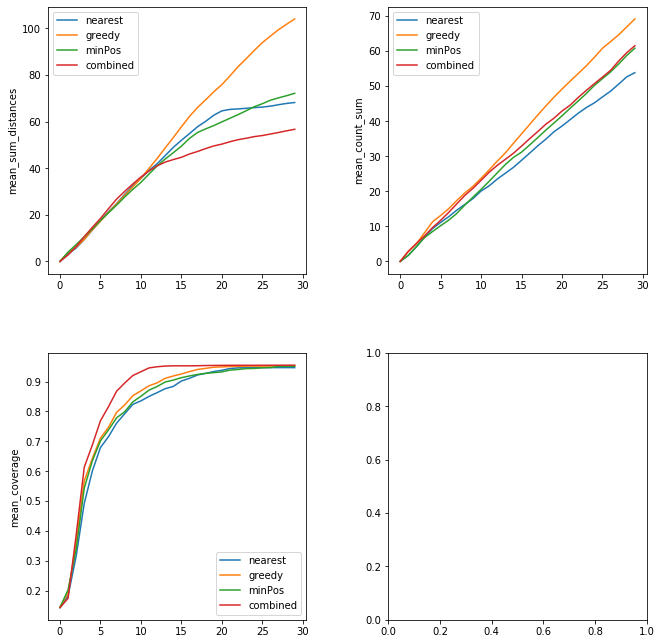

In [40]:
try:
    os.chdir('../../map_3/coverage/3')
except:
    os.chdir('../../../map_3/coverage/3')

matrix_coverage_greedy_3 = []
matrix_coverage_minPos_3 = []
matrix_coverage_combined_3 = []
matrix_coverage_nearest_3 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_3.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_3.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_3.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_3.append(np.loadtxt(file_path))

matrix_coverage_nearest_3 = np.array(matrix_coverage_nearest_3)
matrix_coverage_greedy_3 = np.array(matrix_coverage_greedy_3)
matrix_coverage_minPos_3 = np.array(matrix_coverage_minPos_3)
matrix_coverage_combined_3 = np.array(matrix_coverage_combined_3)
print(matrix_coverage_nearest_3.shape)
print(matrix_coverage_greedy_3.shape)
print(matrix_coverage_minPos_3.shape)
print(matrix_coverage_combined_3.shape)

os.chdir('../../../map_3/distances/3')

matrix_distance_greedy_3 = []
matrix_distance_minPos_3 = []
matrix_distance_combined_3 = []
matrix_distance_nearest_3 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_3.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_3.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_3.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_3.append(np.loadtxt(file_path))

matrix_distance_nearest_3 = np.array(matrix_distance_nearest_3)
matrix_distance_greedy_3 = np.array(matrix_distance_greedy_3)
matrix_distance_minPos_3 = np.array(matrix_distance_minPos_3)
matrix_distance_combined_3 = np.array(matrix_distance_combined_3)
print(matrix_distance_nearest_3.shape)
print(matrix_distance_greedy_3.shape)
print(matrix_distance_minPos_3.shape)
print(matrix_distance_combined_3.shape)

nearest_coverage_plottable_3, nearest_distance_plottable_3, nearest_time_taken_3 = matrix_builder(matrix_coverage_nearest_3, matrix_distance_nearest_3)
greedy_coverage_plottable_3, greedy_distance_plottable_3, greedy_time_taken_3 = matrix_builder(matrix_coverage_greedy_3, matrix_distance_greedy_3)
minPos_coverage_plottable_3, minPos_distance_plottable_3, minPos_time_taken_3 = matrix_builder(matrix_coverage_minPos_3, matrix_distance_minPos_3)
combined_coverage_plottable_3, combined_distance_plottable_3, combined_time_taken_3 = matrix_builder(matrix_coverage_combined_3, matrix_distance_combined_3)

values_map_3_nearest = min_mean_max_extraction(nearest_time_taken_3)
values_map_3_greedy = min_mean_max_extraction(greedy_time_taken_3)
values_map_3_minPos = min_mean_max_extraction(minPos_time_taken_3)
values_map_3_combined = min_mean_max_extraction(combined_time_taken_3)
values_map_3 = [[values_map_3_nearest], [values_map_3_greedy], [values_map_3_minPos], [values_map_3_combined]]

print(nearest_coverage_plottable_3.shape)
print(greedy_coverage_plottable_3.shape)
print(minPos_coverage_plottable_3.shape)
print(combined_coverage_plottable_3.shape)
print(nearest_distance_plottable_3.shape)
print(greedy_distance_plottable_3.shape)
print(minPos_distance_plottable_3.shape)
print(combined_distance_plottable_3.shape)

nearest_mean_3= np.mean(nearest_coverage_plottable_3[:,1:11], axis=1)
greedy_mean_3= np.mean(greedy_coverage_plottable_3[:,1:11], axis=1)
minPos_mean_3= np.mean(minPos_coverage_plottable_3[:,1:11], axis=1)
combined_mean_3= np.mean(combined_coverage_plottable_3[:,1:11], axis=1)

nearest_distances_3, nearest_counting_3, nearest_distances_3_sum, nearest_counting_3_sum = matrix_splice(nearest_distance_plottable_3, 3)
greedy_distances_3, greedy_counting_3, greedy_distances_3_sum, greedy_counting_3_sum = matrix_splice(greedy_distance_plottable_3, 3)
minPos_distances_3, minPos_counting_3, minPos_distances_3_sum, minPos_counting_3_sum = matrix_splice(minPos_distance_plottable_3, 3)
combined_distances_3, combined_counting_3, combined_distances_3_sum, combined_counting_3_sum = matrix_splice(combined_distance_plottable_3, 3)
nearest_distances_3_sum_mean = np.mean(nearest_distances_3_sum[:, 1:11], axis=1)
greedy_distances_3_sum_mean = np.mean(greedy_distances_3_sum[:, 1:11], axis=1)
minPos_distances_3_sum_mean = np.mean(minPos_distances_3_sum[:, 1:11], axis=1)
combined_distances_3_sum_mean = np.mean(combined_distances_3_sum[:, 1:11], axis=1)
nearest_counting_3_sum_mean = np.mean(nearest_counting_3_sum[:, 1:-1], axis=1)
greedy_counting_3_sum_mean = np.mean(greedy_counting_3_sum[:, 1:-1], axis=1)
minPos_counting_3_sum_mean = np.mean(minPos_counting_3_sum[:, 1:-1], axis=1)
combined_counting_3_sum_mean = np.mean(combined_counting_3_sum[:, 1:-1], axis=1)
nearest_distances_3_mean = np.mean(nearest_distances_3[:, 1:-1], axis=1)
greedy_distances_3_mean = np.mean(greedy_distances_3[:, 1:-1], axis=1)
minPos_distances_3_mean = np.mean(minPos_distances_3[:, 1:-1], axis=1)
combined_distances_3_mean = np.mean(combined_distances_3[:, 1:-1], axis=1)
nearest_counting_3_mean = np.mean(nearest_counting_3[:, 1:-1], axis=1)
greedy_counting_3_mean = np.mean(greedy_counting_3[:, 1:-1], axis=1)
minPos_counting_3_mean = np.mean(minPos_counting_3[:, 1:-1], axis=1)
combined_counting_3_mean = np.mean(combined_counting_3[:, 1:-1], axis=1)
nearest_distances_3_sum_median = np.median(nearest_distances_3_sum[:, 1:-1], axis=1)
greedy_distances_3_sum_median = np.median(greedy_distances_3_sum[:, 1:-1], axis=1)
minPos_distances_3_sum_median = np.median(minPos_distances_3_sum[:, 1:-1], axis=1)
combined_distances_3_sum_median = np.median(combined_distances_3_sum[:, 1:-1], axis=1)
nearest_counting_3_sum_median = np.median(nearest_counting_3_sum[:, 1:-1], axis=1)
greedy_counting_3_sum_median = np.median(greedy_counting_3_sum[:, 1:-1], axis=1)
minPos_counting_3_sum_median = np.median(minPos_counting_3_sum[:, 1:-1], axis=1)
combined_counting_3_sum_median = np.median(combined_counting_3_sum[:, 1:-1], axis=1)
nearest_distances_3_median = np.median(nearest_distances_3[:, 1:-1], axis=1)
greedy_distances_3_median = np.median(greedy_distances_3[:, 1:-1], axis=1)
minPos_distances_3_median = np.median(minPos_distances_3[:, 1:-1], axis=1)
combined_distances_3_median = np.median(combined_distances_3[:, 1:-1], axis=1)
nearest_counting_3_median = np.median(nearest_counting_3[:, 1:-1], axis=1)
greedy_counting_3_median = np.median(greedy_counting_3[:, 1:-1], axis=1)
minPos_counting_3_median = np.median(minPos_counting_3[:, 1:-1], axis=1)
combined_counting_3_median = np.median(combined_counting_3[:, 1:-1], axis=1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_3_sum_mean[:-50], label='nearest')
ax1.plot(greedy_distances_3_sum_mean[:-50], label='greedy')
ax1.plot(minPos_distances_3_sum_mean[:-50], label='minPos')
ax1.plot(combined_distances_3_sum_mean[:-50], label='combined')
ax1.set_ylabel('mean_sum_distances')
ax1.legend()
ax2.plot(nearest_counting_sum_mean[:-50], label='nearest')
ax2.plot(greedy_counting_sum_mean[:-50], label='greedy')
ax2.plot(minPos_counting_sum_mean[:-50], label='minPos')
ax2.plot(combined_counting_sum_mean[:-50], label='combined')
ax2.set_ylabel('mean_count_sum')
ax2.legend()
ax3.plot(nearest_mean_3[:-50], label='nearest')
ax3.plot(greedy_mean_3[:-50], label='greedy')
ax3.plot(minPos_mean_3[:-50], label='minPos')
ax3.plot(combined_mean_3[:-50], label='combined')
ax3.set_ylabel('mean_coverage')
ax3.legend()
fig.tight_layout()
fig.set_size_inches(10, 10)
plt.show()

In [41]:
try:
    os.chdir('../../map_3/coverage/4')
except:
    os.chdir('../../../map_3/coverage/4')

matrix_coverage_greedy_4 = []
matrix_coverage_minPos_4 = []
matrix_coverage_combined_4 = []
matrix_coverage_nearest_4 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_4.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_4.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_4.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_4.append(np.loadtxt(file_path))

matrix_coverage_nearest_4 = np.array(matrix_coverage_nearest_4)
matrix_coverage_greedy_4 = np.array(matrix_coverage_greedy_4)
matrix_coverage_minPos_4 = np.array(matrix_coverage_minPos_4)
matrix_coverage_combined_4 = np.array(matrix_coverage_combined_4)
print(matrix_coverage_nearest_4.shape)
print(matrix_coverage_greedy_4.shape)
print(matrix_coverage_minPos_4.shape)
print(matrix_coverage_combined_4.shape)

os.chdir('../../../map_3/distances/4')

matrix_distance_greedy_4 = []
matrix_distance_minPos_4 = []
matrix_distance_combined_4 = []
matrix_distance_nearest_4 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_4.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_4.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_4.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_4.append(np.loadtxt(file_path))

matrix_distance_nearest_4 = np.array(matrix_distance_nearest_4)
matrix_distance_greedy_4 = np.array(matrix_distance_greedy_4)
matrix_distance_minPos_4 = np.array(matrix_distance_minPos_4)
matrix_distance_combined_4 = np.array(matrix_distance_combined_4)
print(matrix_distance_nearest_4.shape)
print(matrix_distance_greedy_4.shape)
print(matrix_distance_minPos_4.shape)
print(matrix_distance_combined_4.shape)

nearest_coverage_plottable_4, nearest_distance_plottable_4, nearest_time_taken_4 = matrix_builder(matrix_coverage_nearest_4, matrix_distance_nearest_4)
greedy_coverage_plottable_4, greedy_distance_plottable_4, greedy_time_taken_4 = matrix_builder(matrix_coverage_greedy_4, matrix_distance_greedy_4)
minPos_coverage_plottable_4, minPos_distance_plottable_4, minPos_time_taken_4 = matrix_builder(matrix_coverage_minPos_4, matrix_distance_minPos_4)
combined_coverage_plottable_4, combined_distance_plottable_4, combined_time_taken_4 = matrix_builder(matrix_coverage_combined_4, matrix_distance_combined_4)

values_map_4_nearest = min_mean_max_extraction(nearest_time_taken_4[:11])
values_map_4_greedy = min_mean_max_extraction(greedy_time_taken_4[:11])
values_map_4_minPos = min_mean_max_extraction(minPos_time_taken_4[:11])
values_map_4_combined = min_mean_max_extraction(combined_time_taken_4[:11])
values_map_4 = [[values_map_4_nearest], [values_map_4_greedy], [values_map_4_minPos], [values_map_4_combined]]

print(nearest_coverage_plottable_4.shape)
print(greedy_coverage_plottable_4.shape)
print(minPos_coverage_plottable_4.shape)
print(combined_coverage_plottable_4.shape)
print(nearest_distance_plottable_4.shape)
print(greedy_distance_plottable_4.shape)
print(minPos_distance_plottable_4.shape)
print(combined_distance_plottable_4.shape)

nearest_mean_4= np.mean(nearest_coverage_plottable_4[:,1:-1], axis=1)
greedy_mean_4= np.mean(greedy_coverage_plottable_4[:,1:-1], axis=1)
minPos_mean_4= np.mean(minPos_coverage_plottable_4[:,1:-1], axis=1)
combined_mean_4= np.mean(combined_coverage_plottable_4[:,1:-1], axis=1)

nearest_distances_4, nearest_counting_4, nearest_distances_4_sum, nearest_counting_4_sum = matrix_splice(nearest_distance_plottable_4, 4)
greedy_distances_4, greedy_counting_4, greedy_distances_4_sum, greedy_counting_4_sum = matrix_splice(greedy_distance_plottable_4, 4)
minPos_distances_4, minPos_counting_4, minPos_distances_4_sum, minPos_counting_4_sum = matrix_splice(minPos_distance_plottable_4, 4)
combined_distances_4, combined_counting_4, combined_distances_4_sum, combined_counting_4_sum = matrix_splice(combined_distance_plottable_4, 4)
nearest_distances_4_sum_mean = np.mean(nearest_distances_4_sum[:, 1:11], axis=1)
greedy_distances_4_sum_mean = np.mean(greedy_distances_4_sum[:, 1:11], axis=1)
minPos_distances_4_sum_mean = np.mean(minPos_distances_4_sum[:, 1:11], axis=1)
combined_distances_4_sum_mean = np.mean(combined_distances_4_sum[:, 1:11], axis=1)
nearest_counting_4_sum_mean = np.mean(nearest_counting_4_sum[:, 1:-1], axis=1)
greedy_counting_4_sum_mean = np.mean(greedy_counting_4_sum[:, 1:-1], axis=1)
minPos_counting_4_sum_mean = np.mean(minPos_counting_4_sum[:, 1:-1], axis=1)
combined_counting_4_sum_mean = np.mean(combined_counting_4_sum[:, 1:-1], axis=1)
nearest_distances_4_mean = np.mean(nearest_distances_4[:, 1:-1], axis=1)
greedy_distances_4_mean = np.mean(greedy_distances_4[:, 1:-1], axis=1)
minPos_distances_4_mean = np.mean(minPos_distances_4[:, 1:-1], axis=1)
combined_distances_4_mean = np.mean(combined_distances_4[:, 1:-1], axis=1)
nearest_counting_4_mean = np.mean(nearest_counting_4[:, 1:-1], axis=1)
greedy_counting_4_mean = np.mean(greedy_counting_4[:, 1:-1], axis=1)
minPos_counting_4_mean = np.mean(minPos_counting_4[:, 1:-1], axis=1)
combined_counting_4_mean = np.mean(combined_counting_4[:, 1:-1], axis=1)
nearest_distances_4_sum_median = np.median(nearest_distances_4_sum[:, 1:-1], axis=1)
greedy_distances_4_sum_median = np.median(greedy_distances_4_sum[:, 1:-1], axis=1)
minPos_distances_4_sum_median = np.median(minPos_distances_4_sum[:, 1:-1], axis=1)
combined_distances_4_sum_median = np.median(combined_distances_4_sum[:, 1:-1], axis=1)
nearest_counting_4_sum_median = np.median(nearest_counting_4_sum[:, 1:-1], axis=1)
greedy_counting_4_sum_median = np.median(greedy_counting_4_sum[:, 1:-1], axis=1)
minPos_counting_4_sum_median = np.median(minPos_counting_4_sum[:, 1:-1], axis=1)
combined_counting_4_sum_median = np.median(combined_counting_4_sum[:, 1:-1], axis=1)
nearest_distances_4_median = np.median(nearest_distances_4[:, 1:-1], axis=1)
greedy_distances_4_median = np.median(greedy_distances_4[:, 1:-1], axis=1)
minPos_distances_4_median = np.median(minPos_distances_4[:, 1:-1], axis=1)
combined_distances_4_median = np.median(combined_distances_4[:, 1:-1], axis=1)
nearest_counting_4_median = np.median(nearest_counting_4[:, 1:-1], axis=1)
greedy_counting_4_median = np.median(greedy_counting_4[:, 1:-1], axis=1)
minPos_counting_4_median = np.median(minPos_counting_4[:, 1:-1], axis=1)
combined_counting_4_median = np.median(combined_counting_4[:, 1:-1], axis=1)

(20,)
(20,)
(20,)
(20,)
(21,)
(21,)
(22,)
(24,)
(80, 20)
(80, 17)
(80, 12)
(80, 20)
(80, 160)
(80, 136)
(80, 96)
(80, 160)


(20,)
(20,)
(20,)
(20,)
(21,)
(21,)
(21,)
(26,)
(80, 19)
(80, 16)
(80, 19)
(80, 19)
(80, 190)
(80, 160)
(80, 190)
(80, 190)


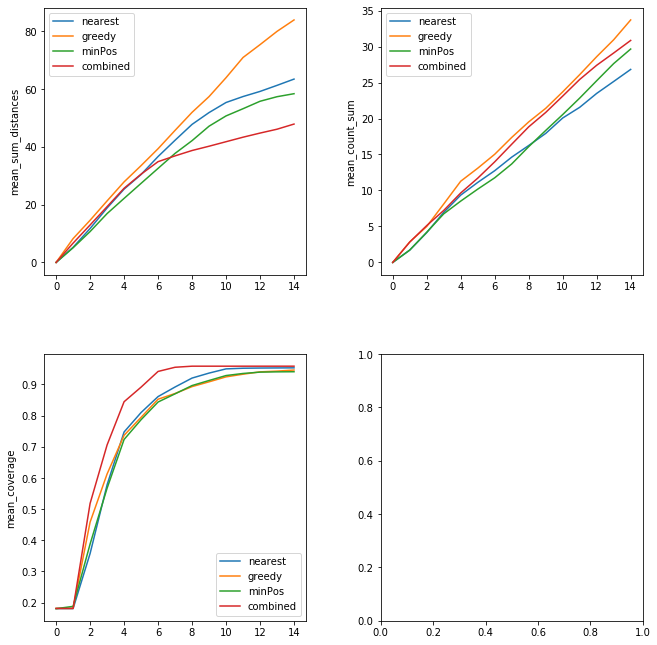

In [42]:
try:
    os.chdir('../../map_3/coverage/5')
except:
    os.chdir('../../../map_3/coverage/5')

matrix_coverage_greedy_5 = []
matrix_coverage_minPos_5 = []
matrix_coverage_combined_5 = []
matrix_coverage_nearest_5 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_5.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_5.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_5.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_5.append(np.loadtxt(file_path))

matrix_coverage_nearest_5 = np.array(matrix_coverage_nearest_5)
matrix_coverage_greedy_5 = np.array(matrix_coverage_greedy_5)
matrix_coverage_minPos_5 = np.array(matrix_coverage_minPos_5)
matrix_coverage_combined_5 = np.array(matrix_coverage_combined_5)
print(matrix_coverage_nearest_5.shape)
print(matrix_coverage_greedy_5.shape)
print(matrix_coverage_minPos_5.shape)
print(matrix_coverage_combined_5.shape)

os.chdir('../../../map_3/distances/5')

matrix_distance_greedy_5 = []
matrix_distance_minPos_5 = []
matrix_distance_combined_5 = []
matrix_distance_nearest_5 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_5.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_5.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_5.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_5.append(np.loadtxt(file_path))

matrix_distance_nearest_5 = np.array(matrix_distance_nearest_5)
matrix_distance_greedy_5 = np.array(matrix_distance_greedy_5)
matrix_distance_minPos_5 = np.array(matrix_distance_minPos_5)
matrix_distance_combined_5 = np.array(matrix_distance_combined_5)
print(matrix_distance_nearest_5.shape)
print(matrix_distance_greedy_5.shape)
print(matrix_distance_minPos_5.shape)
print(matrix_distance_combined_5.shape)

nearest_coverage_plottable_5, nearest_distance_plottable_5, nearest_time_taken_5 = matrix_builder(matrix_coverage_nearest_5, matrix_distance_nearest_5)
greedy_coverage_plottable_5, greedy_distance_plottable_5, greedy_time_taken_5 = matrix_builder(matrix_coverage_greedy_5, matrix_distance_greedy_5)
minPos_coverage_plottable_5, minPos_distance_plottable_5, minPos_time_taken_5 = matrix_builder(matrix_coverage_minPos_5, matrix_distance_minPos_5)
combined_coverage_plottable_5, combined_distance_plottable_5, combined_time_taken_5 = matrix_builder(matrix_coverage_combined_5, matrix_distance_combined_5)

values_map_5_nearest = min_mean_max_extraction(nearest_time_taken_5)
values_map_5_greedy = min_mean_max_extraction(greedy_time_taken_5)
values_map_5_minPos = min_mean_max_extraction(minPos_time_taken_5)
values_map_5_combined = min_mean_max_extraction(combined_time_taken_5)
values_map_5 = [[values_map_5_nearest], [values_map_5_greedy], [values_map_5_minPos], [values_map_5_combined]]

print(nearest_coverage_plottable_5.shape)
print(greedy_coverage_plottable_5.shape)
print(minPos_coverage_plottable_5.shape)
print(combined_coverage_plottable_5.shape)
print(nearest_distance_plottable_5.shape)
print(greedy_distance_plottable_5.shape)
print(minPos_distance_plottable_5.shape)
print(combined_distance_plottable_5.shape)

nearest_mean_5= np.mean(nearest_coverage_plottable_5[:,1:11], axis=1)
greedy_mean_5= np.mean(greedy_coverage_plottable_5[:,1:11], axis=1)
minPos_mean_5= np.mean(minPos_coverage_plottable_5[:,1:11], axis=1)
combined_mean_5= np.mean(combined_coverage_plottable_5[:,1:11], axis=1)

nearest_distances_5, nearest_counting_5, nearest_distances_5_sum, nearest_counting_5_sum = matrix_splice(nearest_distance_plottable_5, 5)
greedy_distances_5, greedy_counting_5, greedy_distances_5_sum, greedy_counting_5_sum = matrix_splice(greedy_distance_plottable_5, 5)
minPos_distances_5, minPos_counting_5, minPos_distances_5_sum, minPos_counting_5_sum = matrix_splice(minPos_distance_plottable_5, 5)
combined_distances_5, combined_counting_5, combined_distances_5_sum, combined_counting_5_sum = matrix_splice(combined_distance_plottable_5, 5)
nearest_distances_5_sum_mean = np.mean(nearest_distances_5_sum[:, 1:11], axis=1)
greedy_distances_5_sum_mean = np.mean(greedy_distances_5_sum[:, 1:11], axis=1)
minPos_distances_5_sum_mean = np.mean(minPos_distances_5_sum[:, 1:11], axis=1)
combined_distances_5_sum_mean = np.mean(combined_distances_5_sum[:, 1:11], axis=1)
nearest_counting_5_sum_mean = np.mean(nearest_counting_5_sum[:, 1:-1], axis=1)
greedy_counting_5_sum_mean = np.mean(greedy_counting_5_sum[:, 1:-1], axis=1)
minPos_counting_5_sum_mean = np.mean(minPos_counting_5_sum[:, 1:-1], axis=1)
combined_counting_5_sum_mean = np.mean(combined_counting_5_sum[:, 1:-1], axis=1)
nearest_distances_5_mean = np.mean(nearest_distances_5[:, 1:-1], axis=1)
greedy_distances_5_mean = np.mean(greedy_distances_5[:, 1:-1], axis=1)
minPos_distances_5_mean = np.mean(minPos_distances_5[:, 1:-1], axis=1)
combined_distances_5_mean = np.mean(combined_distances_5[:, 1:-1], axis=1)
nearest_counting_5_mean = np.mean(nearest_counting_5[:, 1:-1], axis=1)
greedy_counting_5_mean = np.mean(greedy_counting_5[:, 1:-1], axis=1)
minPos_counting_5_mean = np.mean(minPos_counting_5[:, 1:-1], axis=1)
combined_counting_5_mean = np.mean(combined_counting_5[:, 1:-1], axis=1)
nearest_distances_5_sum_median = np.median(nearest_distances_5_sum[:, 1:-1], axis=1)
greedy_distances_5_sum_median = np.median(greedy_distances_5_sum[:, 1:-1], axis=1)
minPos_distances_5_sum_median = np.median(minPos_distances_5_sum[:, 1:-1], axis=1)
combined_distances_5_sum_median = np.median(combined_distances_5_sum[:, 1:-1], axis=1)
nearest_counting_5_sum_median = np.median(nearest_counting_5_sum[:, 1:-1], axis=1)
greedy_counting_5_sum_median = np.median(greedy_counting_5_sum[:, 1:-1], axis=1)
minPos_counting_5_sum_median = np.median(minPos_counting_5_sum[:, 1:-1], axis=1)
combined_counting_5_sum_median = np.median(combined_counting_5_sum[:, 1:-1], axis=1)
nearest_distances_5_median = np.median(nearest_distances_5[:, 1:-1], axis=1)
greedy_distances_5_median = np.median(greedy_distances_5[:, 1:-1], axis=1)
minPos_distances_5_median = np.median(minPos_distances_5[:, 1:-1], axis=1)
combined_distances_5_median = np.median(combined_distances_5[:, 1:-1], axis=1)
nearest_counting_5_median = np.median(nearest_counting_5[:, 1:-1], axis=1)
greedy_counting_5_median = np.median(greedy_counting_5[:, 1:-1], axis=1)
minPos_counting_5_median = np.median(minPos_counting_5[:, 1:-1], axis=1)
combined_counting_5_median = np.median(combined_counting_5[:, 1:-1], axis=1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_5_sum_mean[:-65], label='nearest')
ax1.plot(greedy_distances_5_sum_mean[:-65], label='greedy')
ax1.plot(minPos_distances_5_sum_mean[:-65], label='minPos')
ax1.plot(combined_distances_5_sum_mean[:-65], label='combined')
ax1.set_ylabel('mean_sum_distances')
ax1.legend()
ax2.plot(nearest_counting_sum_mean[:-65], label='nearest')
ax2.plot(greedy_counting_sum_mean[:-65], label='greedy')
ax2.plot(minPos_counting_sum_mean[:-65], label='minPos')
ax2.plot(combined_counting_sum_mean[:-65], label='combined')
ax2.set_ylabel('mean_count_sum')
ax2.legend()
ax3.plot(nearest_mean_5[:-65], label='nearest')
ax3.plot(greedy_mean_5[:-65], label='greedy')
ax3.plot(minPos_mean_5[:-65], label='minPos')
ax3.plot(combined_mean_5[:-65], label='combined')
ax3.set_ylabel('mean_coverage')
ax3.legend()
fig.tight_layout()
fig.set_size_inches(10, 10)
plt.show()

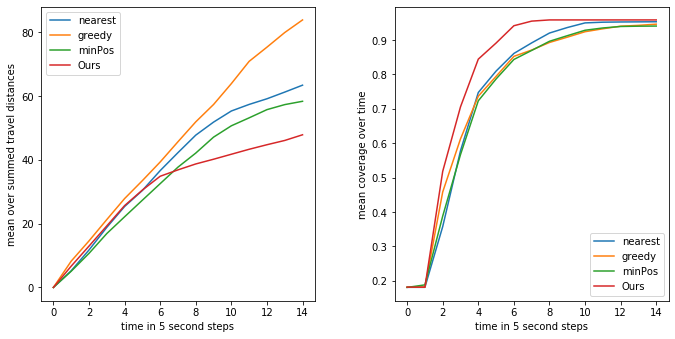

In [43]:
x_axis = np.array(range(0, 16)) * 5
fig, (ax1, ax3) = plt.subplots(1, 2)
ax1.plot(nearest_distances_5_sum_mean[:-65], label='nearest')
ax1.plot(greedy_distances_5_sum_mean[:-65], label='greedy')
ax1.plot(minPos_distances_5_sum_mean[:-65], label='minPos')
ax1.plot(combined_distances_5_sum_mean[:-65], label='Ours')
ax1.set_ylabel('mean over summed travel distances')
ax1.set_xlabel('time in 5 second steps')
ax1.legend()
ax3.plot(nearest_mean_5[:-65], label='nearest')
ax3.plot(greedy_mean_5[:-65], label='greedy')
ax3.plot(minPos_mean_5[:-65], label='minPos')
ax3.plot(combined_mean_5[:-65], label='Ours')
ax3.set_ylabel('mean coverage over time')
ax3.set_xlabel('time in 5 second steps')
ax3.legend()
fig.tight_layout()
fig.set_size_inches(10, 5)
fig.savefig('test.svg')
plt.show()

In [44]:
try:
    os.chdir('../../marty/coverage/2')
except:
    os.chdir('../../../marty/coverage/2')

matrix_coverage_greedy_2 = []
matrix_coverage_minPos_2 = []
matrix_coverage_combined_2 = []
matrix_coverage_nearest_2 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_2.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_2.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_2.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_2.append(np.loadtxt(file_path))

matrix_coverage_nearest_2 = np.array(matrix_coverage_nearest_2)
matrix_coverage_greedy_2 = np.array(matrix_coverage_greedy_2)
matrix_coverage_minPos_2 = np.array(matrix_coverage_minPos_2)
matrix_coverage_combined_2 = np.array(matrix_coverage_combined_2)
print(matrix_coverage_nearest_2.shape)
print(matrix_coverage_greedy_2.shape)
print(matrix_coverage_minPos_2.shape)
print(matrix_coverage_combined_2.shape)

os.chdir('../../../marty/distances/2')

matrix_distance_greedy_2 = []
matrix_distance_minPos_2 = []
matrix_distance_combined_2 = []
matrix_distance_nearest_2 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_2.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_2.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_2.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_2.append(np.loadtxt(file_path))

matrix_distance_nearest_2 = np.array(matrix_distance_nearest_2)
matrix_distance_greedy_2 = np.array(matrix_distance_greedy_2)
matrix_distance_minPos_2 = np.array(matrix_distance_minPos_2)
matrix_distance_combined_2 = np.array(matrix_distance_combined_2)
print(matrix_distance_nearest_2.shape)
print(matrix_distance_greedy_2.shape)
print(matrix_distance_minPos_2.shape)
print(matrix_distance_combined_2.shape)

nearest_coverage_plottable_2, nearest_distance_plottable_2, nearest_time_taken_2 = matrix_builder(matrix_coverage_nearest_2, matrix_distance_nearest_2)
greedy_coverage_plottable_2, greedy_distance_plottable_2, greedy_time_taken_2 = matrix_builder(matrix_coverage_greedy_2, matrix_distance_greedy_2)
minPos_coverage_plottable_2, minPos_distance_plottable_2, minPos_time_taken_2 = matrix_builder(matrix_coverage_minPos_2, matrix_distance_minPos_2)
combined_coverage_plottable_2, combined_distance_plottable_2, combined_time_taken_2 = matrix_builder(matrix_coverage_combined_2, matrix_distance_combined_2)

values_marty_2_nearest = min_mean_max_extraction(nearest_time_taken_2[1:11])
values_marty_2_greedy = min_mean_max_extraction(greedy_time_taken_2[1:11])
values_marty_2_minPos = min_mean_max_extraction(minPos_time_taken_2[1:11])
values_marty_2_combined = min_mean_max_extraction(combined_time_taken_2[1:11])
values_marty_2 = [[values_marty_2_nearest], [values_marty_2_greedy], [values_marty_2_minPos], [values_marty_2_combined]]

print(nearest_coverage_plottable_2.shape)
print(greedy_coverage_plottable_2.shape)
print(minPos_coverage_plottable_2.shape)
print(combined_coverage_plottable_2.shape)
print(nearest_distance_plottable_2.shape)
print(greedy_distance_plottable_2.shape)
print(minPos_distance_plottable_2.shape)
print(combined_distance_plottable_2.shape)

nearest_mean_2= np.mean(nearest_coverage_plottable_2[:,1:11], axis=1)
greedy_mean_2= np.mean(greedy_coverage_plottable_2[:,1:11], axis=1)
minPos_mean_2= np.mean(minPos_coverage_plottable_2[:,1:11], axis=1)
combined_mean_2= np.mean(combined_coverage_plottable_2[:,1:11], axis=1)

nearest_distances_2, nearest_counting_2, nearest_distances_2_sum, nearest_counting_2_sum = matrix_splice(nearest_distance_plottable_2, 2)
greedy_distances_2, greedy_counting_2, greedy_distances_2_sum, greedy_counting_2_sum = matrix_splice(greedy_distance_plottable_2, 2)
minPos_distances_2, minPos_counting_2, minPos_distances_2_sum, minPos_counting_2_sum = matrix_splice(minPos_distance_plottable_2, 2)
combined_distances_2, combined_counting_2, combined_distances_2_sum, combined_counting_2_sum = matrix_splice(combined_distance_plottable_2, 2)
nearest_distances_2_sum_mean = np.mean(nearest_distances_2_sum[:, 1:11], axis=1)
greedy_distances_2_sum_mean = np.mean(greedy_distances_2_sum[:, 1:11], axis=1)
minPos_distances_2_sum_mean = np.mean(minPos_distances_2_sum[:, 1:11], axis=1)
combined_distances_2_sum_mean = np.mean(combined_distances_2_sum[:, 1:11], axis=1)
nearest_counting_2_sum_mean = np.mean(nearest_counting_2_sum[:, 1:-1], axis=1)
greedy_counting_2_sum_mean = np.mean(greedy_counting_2_sum[:, 1:-1], axis=1)
minPos_counting_2_sum_mean = np.mean(minPos_counting_2_sum[:, 1:-1], axis=1)
combined_counting_2_sum_mean = np.mean(combined_counting_2_sum[:, 1:-1], axis=1)
nearest_distances_2_mean = np.mean(nearest_distances_2[:, 1:-1], axis=1)
greedy_distances_2_mean = np.mean(greedy_distances_2[:, 1:-1], axis=1)
minPos_distances_2_mean = np.mean(minPos_distances_2[:, 1:-1], axis=1)
combined_distances_2_mean = np.mean(combined_distances_2[:, 1:-1], axis=1)
nearest_counting_2_mean = np.mean(nearest_counting_2[:, 1:-1], axis=1)
greedy_counting_2_mean = np.mean(greedy_counting_2[:, 1:-1], axis=1)
minPos_counting_2_mean = np.mean(minPos_counting_2[:, 1:-1], axis=1)
combined_counting_2_mean = np.mean(combined_counting_2[:, 1:-1], axis=1)
nearest_distances_2_sum_median = np.median(nearest_distances_2_sum[:, 1:-1], axis=1)
greedy_distances_2_sum_median = np.median(greedy_distances_2_sum[:, 1:-1], axis=1)
minPos_distances_2_sum_median = np.median(minPos_distances_2_sum[:, 1:-1], axis=1)
combined_distances_2_sum_median = np.median(combined_distances_2_sum[:, 1:-1], axis=1)
nearest_counting_2_sum_median = np.median(nearest_counting_2_sum[:, 1:-1], axis=1)
greedy_counting_2_sum_median = np.median(greedy_counting_2_sum[:, 1:-1], axis=1)
minPos_counting_2_sum_median = np.median(minPos_counting_2_sum[:, 1:-1], axis=1)
combined_counting_2_sum_median = np.median(combined_counting_2_sum[:, 1:-1], axis=1)
nearest_distances_2_median = np.median(nearest_distances_2[:, 1:-1], axis=1)
greedy_distances_2_median = np.median(greedy_distances_2[:, 1:-1], axis=1)
minPos_distances_2_median = np.median(minPos_distances_2[:, 1:-1], axis=1)
combined_distances_2_median = np.median(combined_distances_2[:, 1:-1], axis=1)
nearest_counting_2_median = np.median(nearest_counting_2[:, 1:-1], axis=1)
greedy_counting_2_median = np.median(greedy_counting_2[:, 1:-1], axis=1)
minPos_counting_2_median = np.median(minPos_counting_2[:, 1:-1], axis=1)
combined_counting_2_median = np.median(combined_counting_2[:, 1:-1], axis=1)

(30,)
(30,)
(30,)
(20,)
(30,)
(30,)
(30,)
(20,)
(80, 22)
(80, 23)
(80, 21)
(80, 13)
(80, 88)
(80, 92)
(80, 84)
(80, 52)


In [45]:
try:
    os.chdir('../../marty/coverage/3')
except:
    os.chdir('../../../marty/coverage/3')

matrix_coverage_greedy_3 = []
matrix_coverage_minPos_3 = []
matrix_coverage_combined_3 = []
matrix_coverage_nearest_3 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_3.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_3.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_3.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_3.append(np.loadtxt(file_path))

matrix_coverage_nearest_3 = np.array(matrix_coverage_nearest_3)
matrix_coverage_greedy_3 = np.array(matrix_coverage_greedy_3)
matrix_coverage_minPos_3 = np.array(matrix_coverage_minPos_3)
matrix_coverage_combined_3 = np.array(matrix_coverage_combined_3)
print(matrix_coverage_nearest_3.shape)
print(matrix_coverage_greedy_3.shape)
print(matrix_coverage_minPos_3.shape)
print(matrix_coverage_combined_3.shape)

os.chdir('../../../marty/distances/3')

matrix_distance_greedy_3 = []
matrix_distance_minPos_3 = []
matrix_distance_combined_3 = []
matrix_distance_nearest_3 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_3.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_3.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_3.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_3.append(np.loadtxt(file_path))

matrix_distance_nearest_3 = np.array(matrix_distance_nearest_3)
matrix_distance_greedy_3 = np.array(matrix_distance_greedy_3)
matrix_distance_minPos_3 = np.array(matrix_distance_minPos_3)
matrix_distance_combined_3 = np.array(matrix_distance_combined_3)
print(matrix_distance_nearest_3.shape)
print(matrix_distance_greedy_3.shape)
print(matrix_distance_minPos_3.shape)
print(matrix_distance_combined_3.shape)

nearest_coverage_plottable_3, nearest_distance_plottable_3, nearest_time_taken_3 = matrix_builder(matrix_coverage_nearest_3, matrix_distance_nearest_3)
greedy_coverage_plottable_3, greedy_distance_plottable_3, greedy_time_taken_3 = matrix_builder(matrix_coverage_greedy_3, matrix_distance_greedy_3)
minPos_coverage_plottable_3, minPos_distance_plottable_3, minPos_time_taken_3 = matrix_builder(matrix_coverage_minPos_3, matrix_distance_minPos_3)
combined_coverage_plottable_3, combined_distance_plottable_3, combined_time_taken_3 = matrix_builder(matrix_coverage_combined_3, matrix_distance_combined_3)

values_marty_3_nearest = min_mean_max_extraction(nearest_time_taken_3[1:11])
values_marty_3_greedy = min_mean_max_extraction(greedy_time_taken_3[1:11])
values_marty_3_minPos = min_mean_max_extraction(minPos_time_taken_3[1:11])
values_marty_3_combined = min_mean_max_extraction(combined_time_taken_3[1:11])
values_marty_3 = [[values_marty_3_nearest], [values_marty_3_greedy], [values_marty_3_minPos], [values_marty_3_combined]]

print(nearest_coverage_plottable_3.shape)
print(greedy_coverage_plottable_3.shape)
print(minPos_coverage_plottable_3.shape)
print(combined_coverage_plottable_3.shape)
print(nearest_distance_plottable_3.shape)
print(greedy_distance_plottable_3.shape)
print(minPos_distance_plottable_3.shape)
print(combined_distance_plottable_3.shape)

nearest_mean_3= np.mean(nearest_coverage_plottable_3[:,1:11], axis=1)
greedy_mean_3= np.mean(greedy_coverage_plottable_3[:,1:11], axis=1)
minPos_mean_3= np.mean(minPos_coverage_plottable_3[:,1:11], axis=1)
combined_mean_3= np.mean(combined_coverage_plottable_3[:,1:11], axis=1)

nearest_distances_3, nearest_counting_3, nearest_distances_3_sum, nearest_counting_3_sum = matrix_splice(nearest_distance_plottable_3, 3)
greedy_distances_3, greedy_counting_3, greedy_distances_3_sum, greedy_counting_3_sum = matrix_splice(greedy_distance_plottable_3, 3)
minPos_distances_3, minPos_counting_3, minPos_distances_3_sum, minPos_counting_3_sum = matrix_splice(minPos_distance_plottable_3, 3)
combined_distances_3, combined_counting_3, combined_distances_3_sum, combined_counting_3_sum = matrix_splice(combined_distance_plottable_3, 3)
nearest_distances_3_sum_mean = np.mean(nearest_distances_3_sum[:, 1:11], axis=1)
greedy_distances_3_sum_mean = np.mean(greedy_distances_3_sum[:, 1:11], axis=1)
minPos_distances_3_sum_mean = np.mean(minPos_distances_3_sum[:, 1:11], axis=1)
combined_distances_3_sum_mean = np.mean(combined_distances_3_sum[:, 1:11], axis=1)
nearest_counting_3_sum_mean = np.mean(nearest_counting_3_sum[:, 1:-1], axis=1)
greedy_counting_3_sum_mean = np.mean(greedy_counting_3_sum[:, 1:-1], axis=1)
minPos_counting_3_sum_mean = np.mean(minPos_counting_3_sum[:, 1:-1], axis=1)
combined_counting_3_sum_mean = np.mean(combined_counting_3_sum[:, 1:-1], axis=1)
nearest_distances_3_mean = np.mean(nearest_distances_3[:, 1:-1], axis=1)
greedy_distances_3_mean = np.mean(greedy_distances_3[:, 1:-1], axis=1)
minPos_distances_3_mean = np.mean(minPos_distances_3[:, 1:-1], axis=1)
combined_distances_3_mean = np.mean(combined_distances_3[:, 1:-1], axis=1)
nearest_counting_3_mean = np.mean(nearest_counting_3[:, 1:-1], axis=1)
greedy_counting_3_mean = np.mean(greedy_counting_3[:, 1:-1], axis=1)
minPos_counting_3_mean = np.mean(minPos_counting_3[:, 1:-1], axis=1)
combined_counting_3_mean = np.mean(combined_counting_3[:, 1:-1], axis=1)
nearest_distances_3_sum_median = np.median(nearest_distances_3_sum[:, 1:-1], axis=1)
greedy_distances_3_sum_median = np.median(greedy_distances_3_sum[:, 1:-1], axis=1)
minPos_distances_3_sum_median = np.median(minPos_distances_3_sum[:, 1:-1], axis=1)
combined_distances_3_sum_median = np.median(combined_distances_3_sum[:, 1:-1], axis=1)
nearest_counting_3_sum_median = np.median(nearest_counting_3_sum[:, 1:-1], axis=1)
greedy_counting_3_sum_median = np.median(greedy_counting_3_sum[:, 1:-1], axis=1)
minPos_counting_3_sum_median = np.median(minPos_counting_3_sum[:, 1:-1], axis=1)
combined_counting_3_sum_median = np.median(combined_counting_3_sum[:, 1:-1], axis=1)
nearest_distances_3_median = np.median(nearest_distances_3[:, 1:-1], axis=1)
greedy_distances_3_median = np.median(greedy_distances_3[:, 1:-1], axis=1)
minPos_distances_3_median = np.median(minPos_distances_3[:, 1:-1], axis=1)
combined_distances_3_median = np.median(combined_distances_3[:, 1:-1], axis=1)
nearest_counting_3_median = np.median(nearest_counting_3[:, 1:-1], axis=1)
greedy_counting_3_median = np.median(greedy_counting_3[:, 1:-1], axis=1)
minPos_counting_3_median = np.median(minPos_counting_3[:, 1:-1], axis=1)
combined_counting_3_median = np.median(combined_counting_3[:, 1:-1], axis=1)

(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(21,)
(20,)
(80, 13)
(80, 16)
(80, 15)
(80, 18)
(80, 78)
(80, 96)
(80, 90)
(80, 108)


In [46]:
try:
    os.chdir('../../marty/coverage/4')
except:
    os.chdir('../../../marty/coverage/4')

matrix_coverage_greedy_4 = []
matrix_coverage_minPos_4 = []
matrix_coverage_combined_4 = []
matrix_coverage_nearest_4 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_4.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_4.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_4.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_4.append(np.loadtxt(file_path))

matrix_coverage_nearest_4 = np.array(matrix_coverage_nearest_4)
matrix_coverage_greedy_4 = np.array(matrix_coverage_greedy_4)
matrix_coverage_minPos_4 = np.array(matrix_coverage_minPos_4)
matrix_coverage_combined_4 = np.array(matrix_coverage_combined_4)

os.chdir('../../../marty/distances/4')

matrix_distance_greedy_4 = []
matrix_distance_minPos_4 = []
matrix_distance_combined_4 = []
matrix_distance_nearest_4 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_4.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_4.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_4.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_4.append(np.loadtxt(file_path))

matrix_distance_nearest_4 = np.array(matrix_distance_nearest_4)
matrix_distance_greedy_4 = np.array(matrix_distance_greedy_4)
matrix_distance_minPos_4 = np.array(matrix_distance_minPos_4)
matrix_distance_combined_4 = np.array(matrix_distance_combined_4)

nearest_coverage_plottable_4, nearest_distance_plottable_4, nearest_time_taken_4 = matrix_builder(matrix_coverage_nearest_4, matrix_distance_nearest_4)
greedy_coverage_plottable_4, greedy_distance_plottable_4, greedy_time_taken_4 = matrix_builder(matrix_coverage_greedy_4, matrix_distance_greedy_4)
minPos_coverage_plottable_4, minPos_distance_plottable_4, minPos_time_taken_4 = matrix_builder(matrix_coverage_minPos_4, matrix_distance_minPos_4)
combined_coverage_plottable_4, combined_distance_plottable_4, combined_time_taken_4 = matrix_builder(matrix_coverage_combined_4, matrix_distance_combined_4)

values_marty_4_nearest = min_mean_max_extraction(nearest_time_taken_4[1:11])
values_marty_4_greedy = min_mean_max_extraction(greedy_time_taken_4[1:11])
values_marty_4_minPos = min_mean_max_extraction(minPos_time_taken_4[1:11])
values_marty_4_combined = min_mean_max_extraction(combined_time_taken_4[1:11])
values_marty_4 = [[values_marty_4_nearest], [values_marty_4_greedy], [values_marty_4_minPos], [values_marty_4_combined]]

print(nearest_coverage_plottable_4.shape)
print(greedy_coverage_plottable_4.shape)
print(minPos_coverage_plottable_4.shape)
print(combined_coverage_plottable_4.shape)
print(nearest_distance_plottable_4.shape)
print(greedy_distance_plottable_4.shape)
print(minPos_distance_plottable_4.shape)
print(combined_distance_plottable_4.shape)

nearest_mean_4= np.mean(nearest_coverage_plottable_4[:,1:11], axis=1)
greedy_mean_4= np.mean(greedy_coverage_plottable_4[:,1:11], axis=1)
minPos_mean_4= np.mean(minPos_coverage_plottable_4[:,1:11], axis=1)
combined_mean_4= np.mean(combined_coverage_plottable_4[:,1:11], axis=1)

nearest_distances_4, nearest_counting_4, nearest_distances_4_sum, nearest_counting_4_sum = matrix_splice(nearest_distance_plottable_4, 4)
greedy_distances_4, greedy_counting_4, greedy_distances_4_sum, greedy_counting_4_sum = matrix_splice(greedy_distance_plottable_4, 4)
minPos_distances_4, minPos_counting_4, minPos_distances_4_sum, minPos_counting_4_sum = matrix_splice(minPos_distance_plottable_4, 4)
combined_distances_4, combined_counting_4, combined_distances_4_sum, combined_counting_4_sum = matrix_splice(combined_distance_plottable_4, 4)
nearest_distances_4_sum_mean = np.mean(nearest_distances_4_sum[:, 1:11], axis=1)
greedy_distances_4_sum_mean = np.mean(greedy_distances_4_sum[:, 1:11], axis=1)
minPos_distances_4_sum_mean = np.mean(minPos_distances_4_sum[:, 1:11], axis=1)
combined_distances_4_sum_mean = np.mean(combined_distances_4_sum[:, 1:11], axis=1)
nearest_counting_4_sum_mean = np.mean(nearest_counting_4_sum[:, 1:-1], axis=1)
greedy_counting_4_sum_mean = np.mean(greedy_counting_4_sum[:, 1:-1], axis=1)
minPos_counting_4_sum_mean = np.mean(minPos_counting_4_sum[:, 1:-1], axis=1)
combined_counting_4_sum_mean = np.mean(combined_counting_4_sum[:, 1:-1], axis=1)
nearest_distances_4_mean = np.mean(nearest_distances_4[:, 1:-1], axis=1)
greedy_distances_4_mean = np.mean(greedy_distances_4[:, 1:-1], axis=1)
minPos_distances_4_mean = np.mean(minPos_distances_4[:, 1:-1], axis=1)
combined_distances_4_mean = np.mean(combined_distances_4[:, 1:-1], axis=1)
nearest_counting_4_mean = np.mean(nearest_counting_4[:, 1:-1], axis=1)
greedy_counting_4_mean = np.mean(greedy_counting_4[:, 1:-1], axis=1)
minPos_counting_4_mean = np.mean(minPos_counting_4[:, 1:-1], axis=1)
combined_counting_4_mean = np.mean(combined_counting_4[:, 1:-1], axis=1)
nearest_distances_4_sum_median = np.median(nearest_distances_4_sum[:, 1:-1], axis=1)
greedy_distances_4_sum_median = np.median(greedy_distances_4_sum[:, 1:-1], axis=1)
minPos_distances_4_sum_median = np.median(minPos_distances_4_sum[:, 1:-1], axis=1)
combined_distances_4_sum_median = np.median(combined_distances_4_sum[:, 1:-1], axis=1)
nearest_counting_4_sum_median = np.median(nearest_counting_4_sum[:, 1:-1], axis=1)
greedy_counting_4_sum_median = np.median(greedy_counting_4_sum[:, 1:-1], axis=1)
minPos_counting_4_sum_median = np.median(minPos_counting_4_sum[:, 1:-1], axis=1)
combined_counting_4_sum_median = np.median(combined_counting_4_sum[:, 1:-1], axis=1)
nearest_distances_4_median = np.median(nearest_distances_4[:, 1:-1], axis=1)
greedy_distances_4_median = np.median(greedy_distances_4[:, 1:-1], axis=1)
minPos_distances_4_median = np.median(minPos_distances_4[:, 1:-1], axis=1)
combined_distances_4_median = np.median(combined_distances_4[:, 1:-1], axis=1)
nearest_counting_4_median = np.median(nearest_counting_4[:, 1:-1], axis=1)
greedy_counting_4_median = np.median(greedy_counting_4[:, 1:-1], axis=1)
minPos_counting_4_median = np.median(minPos_counting_4[:, 1:-1], axis=1)
combined_counting_4_median = np.median(combined_counting_4[:, 1:-1], axis=1)

(80, 20)
(80, 14)
(80, 18)
(80, 19)
(80, 160)
(80, 112)
(80, 144)
(80, 152)


In [47]:
try:
    os.chdir('../../marty/coverage/5')
except:
    os.chdir('../../../marty/coverage/5')

matrix_coverage_greedy_5 = []
matrix_coverage_minPos_5 = []
matrix_coverage_combined_5 = []
matrix_coverage_nearest_5 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_coverage_nearest_5.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_coverage_greedy_5.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_coverage_minPos_5.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_coverage_combined_5.append(np.loadtxt(file_path))

matrix_coverage_nearest_5 = np.array(matrix_coverage_nearest_5)
matrix_coverage_greedy_5 = np.array(matrix_coverage_greedy_5)
matrix_coverage_minPos_5 = np.array(matrix_coverage_minPos_5)
matrix_coverage_combined_5 = np.array(matrix_coverage_combined_5)
print(matrix_coverage_nearest_5.shape)
print(matrix_coverage_greedy_5.shape)
print(matrix_coverage_minPos_5.shape)
print(matrix_coverage_combined_5.shape)

os.chdir('../../../marty/distances/5')

matrix_distance_greedy_5 = []
matrix_distance_minPos_5 = []
matrix_distance_combined_5 = []
matrix_distance_nearest_5 = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('nearest' in file_path):
            matrix_distance_nearest_5.append(np.loadtxt(file_path))
        if('greedy' in file_path):
            matrix_distance_greedy_5.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos_5.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined_5.append(np.loadtxt(file_path))

matrix_distance_nearest_5 = np.array(matrix_distance_nearest_5)
matrix_distance_greedy_5 = np.array(matrix_distance_greedy_5)
matrix_distance_minPos_5 = np.array(matrix_distance_minPos_5)
matrix_distance_combined_5 = np.array(matrix_distance_combined_5)
print(matrix_distance_nearest_5.shape)
print(matrix_distance_greedy_5.shape)
print(matrix_distance_minPos_5.shape)
print(matrix_distance_combined_5.shape)

nearest_coverage_plottable_5, nearest_distance_plottable_5, nearest_time_taken_5 = matrix_builder(matrix_coverage_nearest_5, matrix_distance_nearest_5)
greedy_coverage_plottable_5, greedy_distance_plottable_5, greedy_time_taken_5 = matrix_builder(matrix_coverage_greedy_5, matrix_distance_greedy_5)
minPos_coverage_plottable_5, minPos_distance_plottable_5, minPos_time_taken_5 = matrix_builder(matrix_coverage_minPos_5, matrix_distance_minPos_5)
combined_coverage_plottable_5, combined_distance_plottable_5, combined_time_taken_5 = matrix_builder(matrix_coverage_combined_5, matrix_distance_combined_5)

values_marty_5_nearest = min_mean_max_extraction(nearest_time_taken_5[1:11])
values_marty_5_greedy = min_mean_max_extraction(greedy_time_taken_5[1:11])
values_marty_5_minPos = min_mean_max_extraction(minPos_time_taken_5[1:11])
values_marty_5_combined = min_mean_max_extraction(combined_time_taken_5[1:11])
values_marty_5 = [[values_marty_5_nearest], [values_marty_5_greedy], [values_marty_5_minPos], [values_marty_5_combined]]

print(nearest_coverage_plottable_5.shape)
print(greedy_coverage_plottable_5.shape)
print(minPos_coverage_plottable_5.shape)
print(combined_coverage_plottable_5.shape)
print(nearest_distance_plottable_5.shape)
print(greedy_distance_plottable_5.shape)
print(minPos_distance_plottable_5.shape)
print(combined_distance_plottable_5.shape)

nearest_mean_5= np.mean(nearest_coverage_plottable_5[:,1:11], axis=1)
greedy_mean_5= np.mean(greedy_coverage_plottable_5[:,1:11], axis=1)
minPos_mean_5= np.mean(minPos_coverage_plottable_5[:,1:11], axis=1)
combined_mean_5= np.mean(combined_coverage_plottable_5[:,1:11], axis=1)

nearest_distances_5, nearest_counting_5, nearest_distances_5_sum, nearest_counting_5_sum = matrix_splice(nearest_distance_plottable_5, 5)
greedy_distances_5, greedy_counting_5, greedy_distances_5_sum, greedy_counting_5_sum = matrix_splice(greedy_distance_plottable_5, 5)
minPos_distances_5, minPos_counting_5, minPos_distances_5_sum, minPos_counting_5_sum = matrix_splice(minPos_distance_plottable_5, 5)
combined_distances_5, combined_counting_5, combined_distances_5_sum, combined_counting_5_sum = matrix_splice(combined_distance_plottable_5, 5)
nearest_distances_5_sum_mean = np.mean(nearest_distances_5_sum[:, 1:11], axis=1)
greedy_distances_5_sum_mean = np.mean(greedy_distances_5_sum[:, 1:11], axis=1)
minPos_distances_5_sum_mean = np.mean(minPos_distances_5_sum[:, 1:11], axis=1)
combined_distances_5_sum_mean = np.mean(combined_distances_5_sum[:, 1:11], axis=1)
nearest_counting_5_sum_mean = np.mean(nearest_counting_5_sum[:, 1:-1], axis=1)
greedy_counting_5_sum_mean = np.mean(greedy_counting_5_sum[:, 1:-1], axis=1)
minPos_counting_5_sum_mean = np.mean(minPos_counting_5_sum[:, 1:-1], axis=1)
combined_counting_5_sum_mean = np.mean(combined_counting_5_sum[:, 1:-1], axis=1)
nearest_distances_5_mean = np.mean(nearest_distances_5[:, 1:-1], axis=1)
greedy_distances_5_mean = np.mean(greedy_distances_5[:, 1:-1], axis=1)
minPos_distances_5_mean = np.mean(minPos_distances_5[:, 1:-1], axis=1)
combined_distances_5_mean = np.mean(combined_distances_5[:, 1:-1], axis=1)
nearest_counting_5_mean = np.mean(nearest_counting_5[:, 1:-1], axis=1)
greedy_counting_5_mean = np.mean(greedy_counting_5[:, 1:-1], axis=1)
minPos_counting_5_mean = np.mean(minPos_counting_5[:, 1:-1], axis=1)
combined_counting_5_mean = np.mean(combined_counting_5[:, 1:-1], axis=1)
nearest_distances_5_sum_median = np.median(nearest_distances_5_sum[:, 1:-1], axis=1)
greedy_distances_5_sum_median = np.median(greedy_distances_5_sum[:, 1:-1], axis=1)
minPos_distances_5_sum_median = np.median(minPos_distances_5_sum[:, 1:-1], axis=1)
combined_distances_5_sum_median = np.median(combined_distances_5_sum[:, 1:-1], axis=1)
nearest_counting_5_sum_median = np.median(nearest_counting_5_sum[:, 1:-1], axis=1)
greedy_counting_5_sum_median = np.median(greedy_counting_5_sum[:, 1:-1], axis=1)
minPos_counting_5_sum_median = np.median(minPos_counting_5_sum[:, 1:-1], axis=1)
combined_counting_5_sum_median = np.median(combined_counting_5_sum[:, 1:-1], axis=1)
nearest_distances_5_median = np.median(nearest_distances_5[:, 1:-1], axis=1)
greedy_distances_5_median = np.median(greedy_distances_5[:, 1:-1], axis=1)
minPos_distances_5_median = np.median(minPos_distances_5[:, 1:-1], axis=1)
combined_distances_5_median = np.median(combined_distances_5[:, 1:-1], axis=1)
nearest_counting_5_median = np.median(nearest_counting_5[:, 1:-1], axis=1)
greedy_counting_5_median = np.median(greedy_counting_5[:, 1:-1], axis=1)
minPos_counting_5_median = np.median(minPos_counting_5[:, 1:-1], axis=1)
combined_counting_5_median = np.median(combined_counting_5[:, 1:-1], axis=1)

(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(80, 15)
(80, 17)
(80, 20)
(80, 17)
(80, 150)
(80, 170)
(80, 200)
(80, 170)


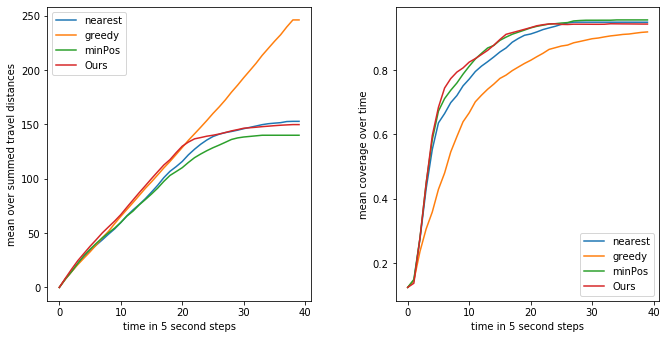

In [48]:
fig, (ax1, ax3) = plt.subplots(1, 2)
ax1.plot(nearest_distances_5_sum_mean[:-40], label='nearest')
ax1.plot(greedy_distances_5_sum_mean[:-40], label='greedy')
ax1.plot(minPos_distances_5_sum_mean[:-40], label='minPos')
ax1.plot(combined_distances_5_sum_mean[:-40], label='Ours')
ax1.set_ylabel('mean over summed travel distances')
ax1.set_xlabel('time in 5 second steps')
ax1.legend()
ax3.plot(nearest_mean_5[:-40], label='nearest')
ax3.plot(greedy_mean_5[:-40], label='greedy')
ax3.plot(minPos_mean_5[:-40], label='minPos')
ax3.plot(combined_mean_5[:-40], label='Ours')
ax3.set_ylabel('mean coverage over time')
ax3.set_xlabel('time in 5 second steps')
ax3.legend()
fig.tight_layout()
fig.set_size_inches(10, 5)
fig.savefig('test.svg')
plt.show()

graphen:
- vorhandene mit Beschriftung
- neuen welten (big)
- vergleiche zwischen roboter anzahlen 
- distribution graphs

In [49]:
values_maze_2
values_maze_3
values_maze_4
values_maze_5
values_map_2
values_map_3
values_map_4
values_map_5

[[array([10.        , 12.72222222, 23.        ])],
 [array([13.        , 15.46666667, 21.        ])],
 [array([10.        , 14.61111111, 29.        ])],
 [array([ 7.        ,  8.72222222, 18.        ])]]

In [50]:
nearest_min_maze = [[values_maze_2[0][:][0][0]],[values_maze_3[0][:][0][0]],[values_maze_4[0][:][0][0]],[values_maze_5[0][:][0][0]]]
nearest_mean_maze = [[values_maze_2[0][:][0][1]],[values_maze_3[0][:][0][1]],[values_maze_4[0][:][0][1]],[values_maze_5[0][:][0][1]]]
nearest_max_maze = [[values_maze_2[0][:][0][2]],[values_maze_3[0][:][0][2]],[values_maze_4[0][:][0][2]],[values_maze_5[0][:][0][2]]]
greedy_min_maze = [[values_maze_2[1][:][0][0]],[values_maze_3[1][:][0][0]],[values_maze_4[1][:][0][0]],[values_maze_5[1][:][0][0]]]
greedy_mean_maze = [[values_maze_2[1][:][0][1]],[values_maze_3[1][:][0][1]],[values_maze_4[1][:][0][1]],[values_maze_5[1][:][0][1]]]
greedy_max_maze = [[values_maze_2[1][:][0][2]],[values_maze_3[1][:][0][2]],[values_maze_4[1][:][0][2]],[values_maze_5[1][:][0][2]]]
minPos_min_maze = [[values_maze_2[2][:][0][0]],[values_maze_3[2][:][0][0]],[values_maze_4[2][:][0][0]],[values_maze_5[2][:][0][0]]]
minPos_mean_maze = [[values_maze_2[2][:][0][1]],[values_maze_3[2][:][0][1]],[values_maze_4[2][:][0][1]],[values_maze_5[2][:][0][1]]]
minPos_max_maze = [[values_maze_2[2][:][0][2]],[values_maze_3[2][:][0][2]],[values_maze_4[2][:][0][2]],[values_maze_5[2][:][0][2]]]
combined_min_maze = [[values_maze_2[3][:][0][0]],[values_maze_3[3][:][0][0]],[values_maze_4[3][:][0][0]],[values_maze_5[3][:][0][0]]]
combined_mean_maze = [[values_maze_2[3][:][0][1]],[values_maze_3[3][:][0][1]],[values_maze_4[3][:][0][1]],[values_maze_5[3][:][0][1]]]
combined_max_maze = [[values_maze_2[3][:][0][2]],[values_maze_3[3][:][0][2]],[values_maze_4[3][:][0][2]],[values_maze_5[3][:][0][2]]]

nearest_min_map = [[values_map_2[0][:][0][0]],[values_map_3[0][:][0][0]],[values_map_4[0][:][0][0]],[values_map_5[0][:][0][0]]]
nearest_mean_map = [[values_map_2[0][:][0][1]],[values_map_3[0][:][0][1]],[values_map_4[0][:][0][1]],[values_map_5[0][:][0][1]]]
nearest_max_map = [[values_map_2[0][:][0][2]],[values_map_3[0][:][0][2]],[values_map_4[0][:][0][2]],[values_map_5[0][:][0][2]]]
greedy_min_map = [[values_map_2[1][:][0][0]],[values_map_3[1][:][0][0]],[values_map_4[1][:][0][0]],[values_map_5[1][:][0][0]]]
greedy_mean_map = [[values_map_2[1][:][0][1]],[values_map_3[1][:][0][1]],[values_map_4[1][:][0][1]],[values_map_5[1][:][0][1]]]
greedy_max_map = [[values_map_2[1][:][0][2]],[values_map_3[1][:][0][2]],[values_map_4[1][:][0][2]],[values_map_5[1][:][0][2]]]
minPos_min_map = [[values_map_2[2][:][0][0]],[values_map_3[2][:][0][0]],[values_map_4[2][:][0][0]],[values_map_5[2][:][0][0]]]
minPos_mean_map = [[values_map_2[2][:][0][1]],[values_map_3[2][:][0][1]],[values_map_4[2][:][0][1]],[values_map_5[2][:][0][1]]]
minPos_max_map = [[values_map_2[2][:][0][2]],[values_map_3[2][:][0][2]],[values_map_4[2][:][0][2]],[values_map_5[2][:][0][2]]]
combined_min_map = [[values_map_2[3][:][0][0]],[values_map_3[3][:][0][0]],[values_map_4[3][:][0][0]],[values_map_5[3][:][0][0]]]
combined_mean_map = [[values_map_2[3][:][0][1]],[values_map_3[3][:][0][1]],[values_map_4[3][:][0][1]],[values_map_5[3][:][0][1]]]
combined_max_map = [[values_map_2[3][:][0][2]],[values_map_3[3][:][0][2]],[values_map_4[3][:][0][2]],[values_map_5[3][:][0][2]]]

nearest_min_marty = [[values_marty_2[0][:][0][0]],[values_marty_3[0][:][0][0]],[values_marty_4[0][:][0][0]],[values_marty_5[0][:][0][0]]]
nearest_mean_marty = [[values_marty_2[0][:][0][1]],[values_marty_3[0][:][0][1]],[values_marty_4[0][:][0][1]],[values_marty_5[0][:][0][1]]]
nearest_max_marty = [[values_marty_2[0][:][0][2]],[values_marty_3[0][:][0][2]],[values_marty_4[0][:][0][2]],[values_marty_5[0][:][0][2]]]
greedy_min_marty = [[values_marty_2[1][:][0][0]],[values_marty_3[1][:][0][0]],[values_marty_4[1][:][0][0]],[values_marty_5[1][:][0][0]]]
greedy_mean_marty = [[values_marty_2[1][:][0][1]],[values_marty_3[1][:][0][1]],[values_marty_4[1][:][0][1]],[values_marty_5[1][:][0][1]]]
greedy_max_marty = [[values_marty_2[1][:][0][2]],[values_marty_3[1][:][0][2]],[values_marty_4[1][:][0][2]],[values_marty_5[1][:][0][2]]]
minPos_min_marty = [[values_marty_2[2][:][0][0]],[values_marty_3[2][:][0][0]],[values_marty_4[2][:][0][0]],[values_marty_5[2][:][0][0]]]
minPos_mean_marty = [[values_marty_2[2][:][0][1]],[values_marty_3[2][:][0][1]],[values_marty_4[2][:][0][1]],[values_marty_5[2][:][0][1]]]
minPos_max_marty = [[values_marty_2[2][:][0][2]],[values_marty_3[2][:][0][2]],[values_marty_4[2][:][0][2]],[values_marty_5[2][:][0][2]]]
combined_min_marty = [[values_marty_2[3][:][0][0]],[values_marty_3[3][:][0][0]],[values_marty_4[3][:][0][0]],[values_marty_5[3][:][0][0]]]
combined_mean_marty = [[values_marty_2[3][:][0][1]],[values_marty_3[3][:][0][1]],[values_marty_4[3][:][0][1]],[values_marty_5[3][:][0][1]]]
combined_max_marty = [[values_marty_2[3][:][0][2]],[values_marty_3[3][:][0][2]],[values_marty_4[3][:][0][2]],[values_marty_5[3][:][0][2]]]

In [62]:
new_test = np.array(combined_mean_marty)*5
new_test

array([[296. ],
       [191.5],
       [167. ],
       [121.5]])